In [2]:
#!pip install geopandas

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import re
import geopandas as gpd

In [4]:
df = pd.read_csv("netflix.csv")
ChartNumber=""

## $${\color{red}Welcome \space \color{lightblue}To \space \color{orange}Netflix\space CaseStudy}$$

## Defining Problem Statement and Analysing basic metrics (10 Points)
<span style="color: yellow;">
<li> Help Netflix in deciding which type of shows/movies to produce 
<li> How they can grow the business in different countries
</span>


## Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary (10 Points)

In [5]:
print(f'The data contains {df.shape[0]} rows and {df.shape[1]} columns')
print("\nHere are the columns it contains")
print(df.dtypes)

print('\nSome columns have null values.  Here are the details')

for idx, value in df.isna().sum().items():
    if(value>0):
        print(f"Column: {idx}, NA Values: {value}")

The data contains 8807 rows and 12 columns

Here are the columns it contains
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Some columns have null values.  Here are the details
Column: director, NA Values: 2634
Column: cast, NA Values: 825
Column: country, NA Values: 831
Column: date_added, NA Values: 10
Column: rating, NA Values: 4
Column: duration, NA Values: 3


In [6]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [7]:
df.type.unique()

array(['Movie', 'TV Show'], dtype=object)

<span style="color: yellow;">
<li> There are two type of shows – Movies and TV Show
</span>


In [8]:
df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

<span style="color: yellow;">
<li> There are 14 Ratings  - 'PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'
<li>TV-MA is the most common rating for both movies and TV Show
</span>



In [9]:
df.type.value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

<span style="color: yellow;">
<li> There are 6131 movies and 2676 TV Shows
<li>Each TV show could be having 12 episodes, each lasting 40 minutes.
</span>

# Lets clean NA values

In [10]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<span style="color: yellow;">
We have a total of 8807 rows.

Following columns have null values
director        2634
cast             825
country          831
date_added        10
rating             4
duration           3

From the above analysis, we see that 
1. country has 831 Null values 
   - so 10% of rows dont have country.  
   - Country is a important parameter and we would like to fill these NA values probably.
2. There are 2634 entries with no director info, 825 with no cast.  
   - These two columns are not that important for immedate analysis, and we would probably work without these columns.

3. date_added 
   - is a relatively important field for us.  So we would like to impute.
   - As we have all values in release year field, we can use it to fill date_added
4. Rating 
   - only 4 rows having null 
   - - can be given avg value of 3
5. Duration
   - only 3 rows having null  
   - on further analysis, it was found that the duration values have gone to the rating column for these rows.
6. Director, cast - we will fill "other"

In [11]:
#Lets take care of null values.

#Handling null values For Countries- put ALL 
df.country = df.country.fillna('ALL')


In [12]:
#Handling null values For rating
#Find the most popular rating for each type
df.groupby('type')['rating'].agg(lambda x: x.mode().iloc[0])

type
Movie      TV-MA
TV Show    TV-MA
Name: rating, dtype: object

•	<span style="color: yellow;">
TV-MA is the most common rating for both movies and TV Show

In [13]:
#Rating- put TV-MA is most popular rating for both types of shows, so fill it across every null value in rating
df.rating = df.rating.fillna('TV-MA')

In [14]:
#Handling null values For date added by making it as the last day of release year, that is 31-12-<release year>
#before that though, we need to do some cleaning of the date_added column

#Some dates have trailing or leading spaces. remove them
df['date_added'] = df['date_added'].str.strip()
# Trying to convert the 'date_column' to datetime
df['converted_date'] = pd.to_datetime(df['date_added'], errors='coerce')

In [15]:
# Identifying rows that are strings (invalid dates)
invalid_dates = df[df['converted_date'].isna()]
invalid_dates

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,converted_date
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",NaT
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...,NaT
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...,NaT
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...,NaT
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe...",NaT
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,ALL,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...,NaT
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder...",NaT
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",NaT
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",NaT
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ...",NaT


In [16]:
#Fix invalid dates by using release_year 
for r in invalid_dates.iterrows():
    print(r[0])
    #print(r[1]['release_year'])
    df.loc[r[0],'converted_date'] = pd.to_datetime(str(r[1]['release_year']) + '-12-01')


6066
6174
6795
6806
6901
7196
7254
7406
7847
8182


In [17]:
#verify we no longer have any na values in the converted_date column
df['converted_date'].isna().sum()


0

In [18]:
#date_added can be replaced with converted_date, which can then be dropped.
df['date_added'] = df['converted_date']
df.drop(columns='converted_date', inplace=True)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",ALL,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,ALL,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,ALL,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [19]:
#Fill director and cast columns 
df.director= df.director.fillna('other')
df.cast= df.cast.fillna('other')

In [20]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

In [21]:
#Duration column is next.
invalid_duration = df[df['duration'].isna()]


In [22]:
#The rows that have nan duration actually have wrong values in rating
#Duration values have gone into rating column !

#IF we had only one column to update we could have used this, but we need to update two columns
#df['durationN'].fillna(df['rating'], inplace=True)

for r in invalid_duration.iterrows():
    print('Updating index : ',r[0])
    #print(r[1]['release_year'])
    df.loc[r[0],'duration'] = r[1]['rating']
    df.loc[r[0],'rating'] = 'TV-MA' ##fill the most common rating

Updating index :  5541
Updating index :  5794
Updating index :  5813


In [23]:
#Verify we dont have any invalid duration
invalid_duration = df[df['duration'].isna()]
invalid_duration

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


<body style="display: flex; justify-content: center; align-items: center; height: 100vh; background-color: #f0f0f0; margin: 0;">
  <div style="width: 350px; height: 40px; background-color:rgb(145, 255, 102); color: black; display: flex; justify-content: center; align-items: center; font-size: 1.2em; text-align: center;">
    Data has been cleaned !
  

In [24]:
#We now got a clean dataframe, lets save it 
df_cleaned = df.copy(deep=True)
df_cleaned.to_csv("df_cleaned.csv",mode='w')


In [25]:
#Lets add a new duration column, durationN, standing for duration Normalized, to have only minutes based data.
#we will assume a season has 12 shows of 40 minutes each.

def normalizeDuration(x):
    #print(x)
    try:
        val = int(re.search(r'\d+',x).group())
    except:
        print("**************")
    if("Season" in x):
        val*=40*12
    #print(val)
    return val
dfWithDuration = df.copy(deep=True)
dfWithDuration['durationN'] = dfWithDuration['duration'].apply(normalizeDuration)


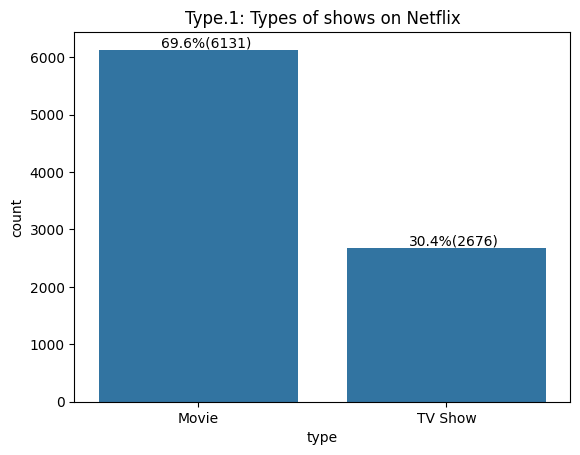

In [26]:
plot=sns.countplot(data=dfWithDuration, x='type')
ChartNumber="Type.1"
plt.title(f'{ChartNumber}: Types of shows on Netflix')
totalNumShows = dfWithDuration.shape[0]
for p in plot.patches:
 plot.annotate('{:}%({:})'.format(round(p.get_height()*100/totalNumShows,1),round(p.get_height())), (p.get_x()+0.25, p.get_height()+50))
plt.show()


Text(0, 2000000, '3.7 times')

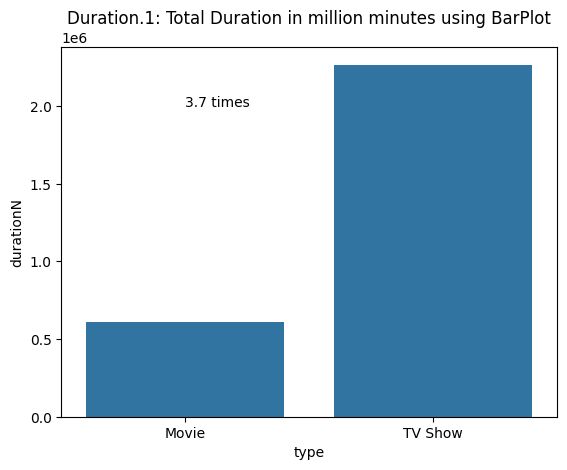

In [27]:

#Lets find total duration for each type
durationData = dfWithDuration.groupby('type').durationN.sum()
sns.barplot(data= durationData)
ChartNumber="Duration.1"
plt.title(f'{ChartNumber}: Total Duration in million minutes using BarPlot')
plt.text(0,2000000,f'{round(durationData.iloc[1]/durationData.iloc[0],1)} times')

Text(0.5, 1.0, 'Duration.5: Distribution of Duration')

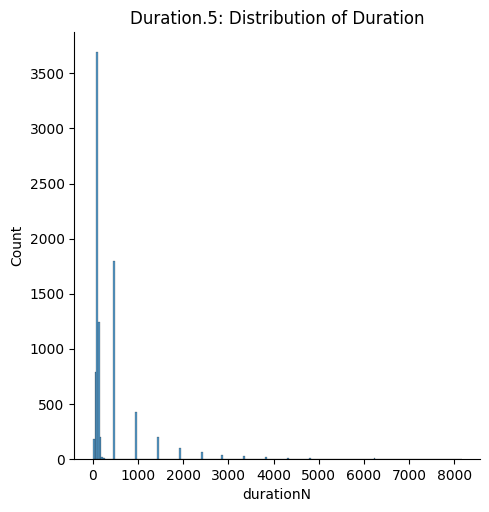

In [28]:
#plt.hexbin(x=df.show_id, y=df.durationN)
sns.displot(dfWithDuration.durationN)

# Set x-axis limits 
#plt.xlim(0, 500) 
ChartNumber="Duration.5"
plt.title(f'{ChartNumber}: Distribution of Duration')

Text(0.5, 1.0, 'Duration.2: Mean values for Duration for Movie and TV Shows using PointPlot')

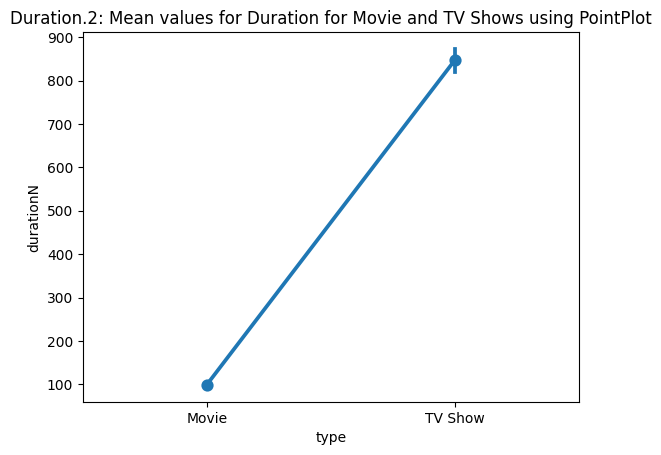

In [29]:
sns.pointplot(data= dfWithDuration, x='type', y='durationN')
ChartNumber="Duration.2"
plt.title(f'{ChartNumber}: Mean values for Duration for Movie and TV Shows using PointPlot')

Text(0.5, 1.0, 'Duration.3: Distribution of Duration values for Movie and TV Shows using Stripplot')

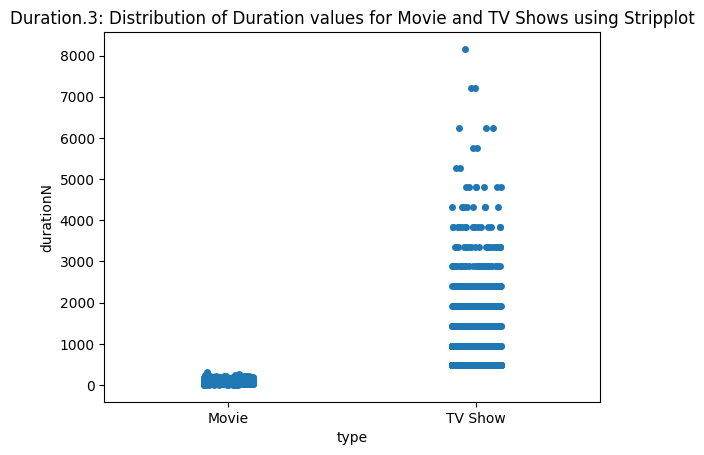

In [30]:
sns.stripplot(data= dfWithDuration, x='type', y='durationN')
ChartNumber="Duration.3"
plt.title(f'{ChartNumber}: Distribution of Duration values for Movie and TV Shows using Stripplot')

<span style="color: yellow;">
Interpretation
- Assuming that each season has 12 episodes and each episode is 40 min on avg, we see that while number of TV shows are less than half of movies, they contain 3.7 times more ‘viewing minutes’ compared to movies.  In other words, out of every 10 minutes of material on Netflix, 8 minutes is TV Show
<p style="background-color: yellow; color: darkblue; padding: 5px; border-radius: 3px;">
    Recommendation: Netflix should focus more on TV Shows
</p>

In [31]:
#Lets find out how many total tv shows have been there and how many lasted more than a season
countMoreThan1Show = dfWithDuration.loc[(dfWithDuration['durationN']>480) & (dfWithDuration['type']=='TV Show')].type.count()
countTotalShows = dfWithDuration.loc[(dfWithDuration['type']=='TV Show')].type.count()
countTotalShows
ratio = countMoreThan1Show/countTotalShows
ratio

0.3299701046337818

<span style="color: yellow;">
<li>32 percent of TV Shows went on to create more than one season.
<li>A show will only go for a new season if it was successful in the first one.


In [32]:
#Lets plot the duration of all TV Shows in ascending manner to uncover its trend.
#

tvshowDuration_df  = dfWithDuration.loc[df['type']=='TV Show'].groupby('durationN', as_index=False).type.count()
#Create a new column called Season, that finds the number of seasons.  As we assumed each season to be 480min, 
# we now divide duration to get back the number of seasons
tvshowDuration_df['season']= (tvshowDuration_df.durationN/480).astype(int)
tvshowDuration_df.rename(columns={'type':'Number of Shows'}, inplace=True)



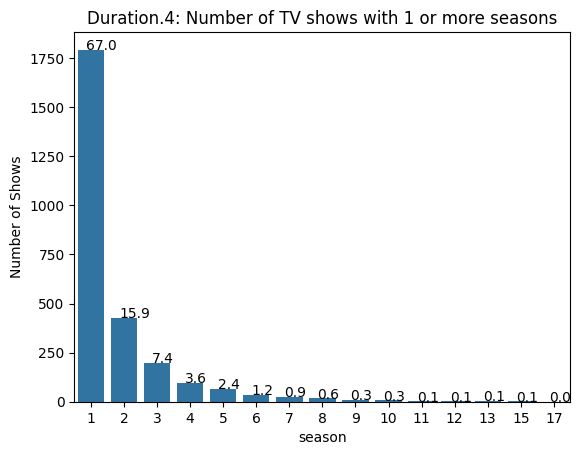

In [33]:

plot = sns.barplot(data= tvshowDuration_df,x='season', y='Number of Shows')
ChartNumber="Duration.4"
plt.title(f'{ChartNumber}: Number of TV shows with 1 or more seasons')
total =  tvshowDuration_df['Number of Shows'].sum()

for p in plot.patches:
 plot.annotate('{:}'.format(round(p.get_height()*100/total,1)), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

<span style="color: yellow;">
<li>The plot reveals that 33 percent of shows go on to make a new season after season 1.
<li>It can be construed that 33 percent of shows are successful

<p style="background-color: yellow; color: darkblue; padding: 5px; border-radius: 3px;">
    Recommendation: Netflix should encourage producers of TV Shows that have done more than one season to do more seasons
</p>

In [34]:
dfWithDuration['date_added_year'] = dfWithDuration.date_added.dt.year
dfWithDuration


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,durationN,date_added_year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,other,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,2021
1,s2,TV Show,Blood & Water,other,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",960,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",ALL,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,480,2021
3,s4,TV Show,Jailbirds New Orleans,other,other,ALL,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",480,2021
4,s5,TV Show,Kota Factory,other,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,960,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158,2019
8803,s8804,TV Show,Zombie Dumb,other,other,ALL,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",960,2019
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88,2019
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88,2020


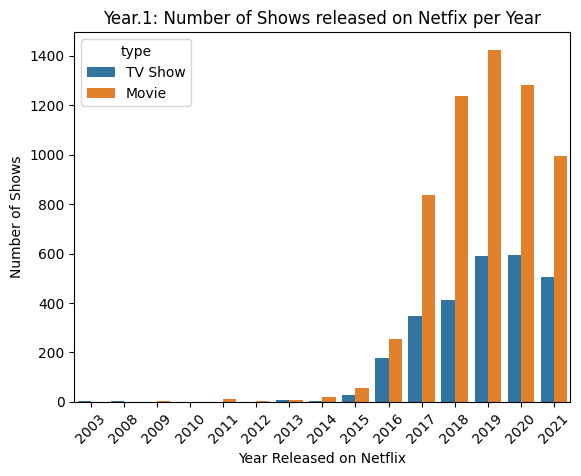

In [35]:
#Lets see if we have any insights to uncover by looking at the date_added for each type of show
dateAdded_df = dfWithDuration.groupby(['date_added_year','type'], as_index=False).show_id.count()
sns.barplot(data=dateAdded_df, x='date_added_year', y= 'show_id', hue='type')
plt.xticks(rotation=45)
plt.xlabel('Year Released on Netflix')
plt.ylabel('Number of Shows') 
ChartNumber="Year.1"
plt.title(f'{ChartNumber}: Number of Shows released on Netfix per Year') 
plt.show()

In [36]:
#Lets see if we have any insights to uncover by looking at the date_added for each type of show
dateAdded_df = dfWithDuration.groupby(['date_added','type'], as_index=False).show_id.count()
dateAdded_df


,date_added,type,show_id
0,2003-12-01,TV Show,2
1,2008-01-01,Movie,1
2,2008-02-04,TV Show,1
3,2008-12-01,TV Show,1
4,2009-05-05,Movie,1
...,...,...,...
2545,2021-09-23,Movie,1
2546,2021-09-23,TV Show,1
2547,2021-09-24,Movie,3
2548,2021-09-24,TV Show,7


In [37]:
released_df = dfWithDuration.groupby('release_year').size().reset_index(name='show_count')
released_df






,release_year,show_count
0,1925,1
1,1942,2
2,1943,3
3,1944,3
4,1945,4
...,...,...
69,2017,1032
70,2018,1147
71,2019,1030
72,2020,953


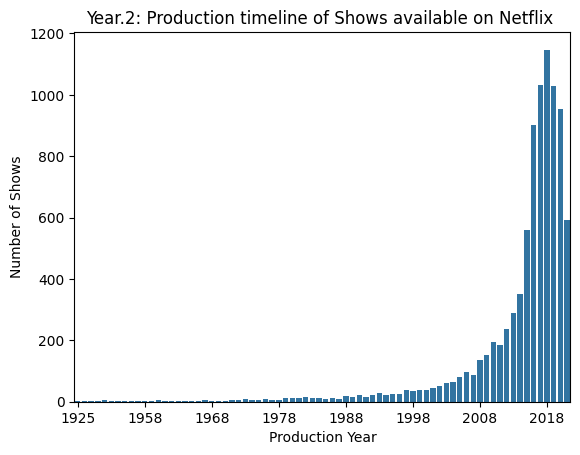

In [38]:
sns.barplot(data=released_df, x='release_year', y='show_count')

plt.xlabel('Production Year')
plt.ylabel('Number of Shows') 
ChartNumber="Year.2"
plt.title(f'{ChartNumber}: Production timeline of Shows available on Netflix ') 


# Calculate the desired xticks
tick_positions = range(0, len(released_df), 10)
tick_labels = [released_df['release_year'][i] for i in tick_positions]

# Set xticks to show only every 10th tick
plt.xticks(ticks=tick_positions, labels=tick_labels)
plt.show()

<span style="color: yellow;">
<li>Maximum number of shows were added to Netflix in 2019
<li>Netflix has a movie as old as 1925.

In [39]:
#We want to find ages 
# 1. how many shows are 1 yr or less
# 2. how many shows are 2 yr to 1 yr
# 3. how many shows are 5 yr to 2 yr
# 4. how many shows are 5+ yrs
released_df['age'] = released_df.release_year.max()-released_df.release_year+1


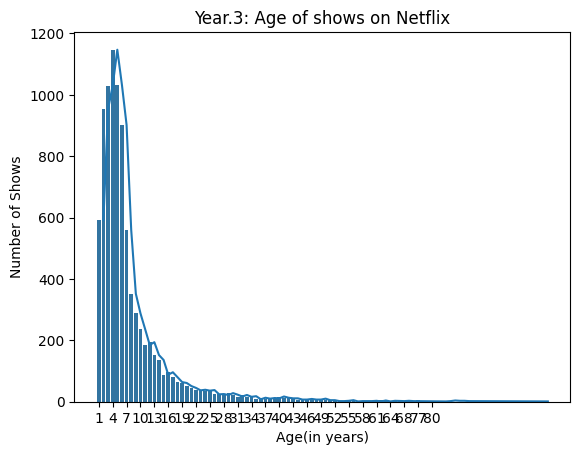

In [40]:
sns.barplot(released_df,x='age',y='show_count')
sns.lineplot(data=released_df, x='age', y='show_count')
# Calculate the desired xticks
tick_positions = range(0,len(released_df),3)
tick_labels = [released_df['age'][len(released_df)-i-1] for i in tick_positions]

# Set xticks to show only every 10th tick
plt.xticks(ticks=tick_positions, labels=tick_labels)
ChartNumber="Year.3"
plt.title(f'{ChartNumber}: Age of shows on Netflix')
plt.xlabel('Age(in years)')
plt.ylabel('Number of Shows')
plt.show()

<span style="color: yellow;">
<li>Most shows on Netflix are not more than 10 yrs old
<li>Max number of shows are 4 yrs old.

In [41]:
released_df


,release_year,show_count,age
0,1925,1,97
1,1942,2,80
2,1943,3,79
3,1944,3,78
4,1945,4,77
...,...,...,...
69,2017,1032,5
70,2018,1147,4
71,2019,1030,3
72,2020,953,2


In [42]:
# Sort the data by production year in descending order
released_df_sorted = released_df.sort_values(by='release_year', ascending=False)

# Calculate the cumulative sum of the number of shows
released_df_sorted['cumulative_shows'] = released_df_sorted['show_count'].cumsum()

# Calculate the cumulative percentage of the number of shows
released_df_sorted['cumulative_percentage'] = 100 * released_df_sorted['cumulative_shows'] / released_df_sorted['show_count'].sum()




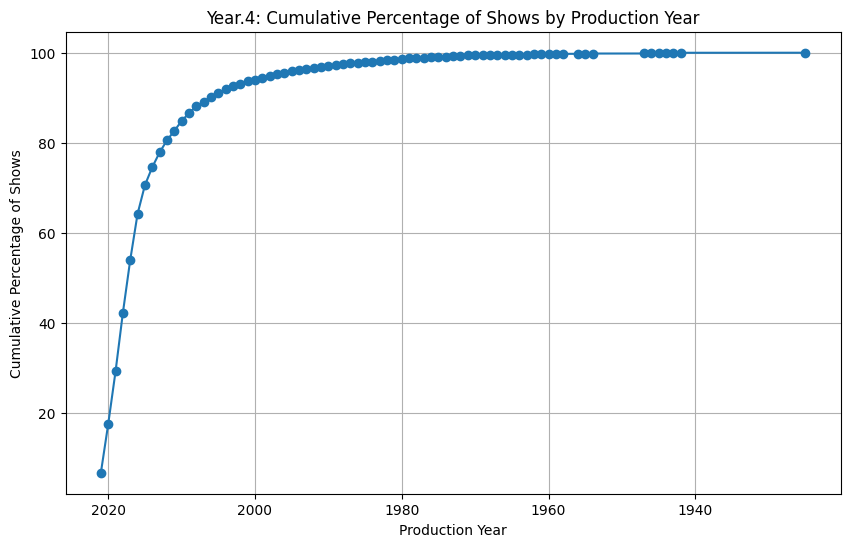

In [43]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(released_df_sorted['release_year'], released_df_sorted['cumulative_percentage'], marker='o')
plt.xlabel('Production Year')
plt.ylabel('Cumulative Percentage of Shows')
ChartNumber="Year.4"
plt.title(f'{ChartNumber}: Cumulative Percentage of Shows by Production Year')
plt.gca().invert_xaxis()  # Invert the x-axis to show the latest year first
plt.grid(True)
plt.show()

In [44]:
pd.set_option('display.max_rows', None)
print(released_df_sorted)
pd.reset_option('display.max_rows')


    release_year  show_count  age  cumulative_shows  cumulative_percentage
73          2021         592    1               592               6.721926
72          2020         953    2              1545              17.542864
71          2019        1030    3              2575              29.238106
70          2018        1147    4              3722              42.261837
69          2017        1032    5              4754              53.979789
68          2016         902    6              5656              64.221642
67          2015         560    7              6216              70.580220
66          2014         352    8              6568              74.577041
65          2013         288    9              6856              77.847167
64          2012         237   10              7093              80.538208
63          2011         185   11              7278              82.638810
62          2010         194   12              7472              84.841603
61          2009         

In [45]:
# Find the year before which 80% of the shows are present 
year_80 = released_df_sorted[released_df_sorted['cumulative_percentage'] <= 80]['release_year'].max()
year_80


2021

<span style="color: yellow;">
<li>50% of shows are 5yr or less old
<li>80% are 9 yr old or less
<li>Interpretation: It confirms that most shows are of recent production and customers prefer not to see very old movies or shows.  Maybe only hit or classic shows will make it to Netflix which are more than 10 yrs old.


In [46]:
released_df

,release_year,show_count,age
0,1925,1,97
1,1942,2,80
2,1943,3,79
3,1944,3,78
4,1945,4,77
...,...,...,...
69,2017,1032,5
70,2018,1147,4
71,2019,1030,3
72,2020,953,2


<Axes: ylabel='release_year'>

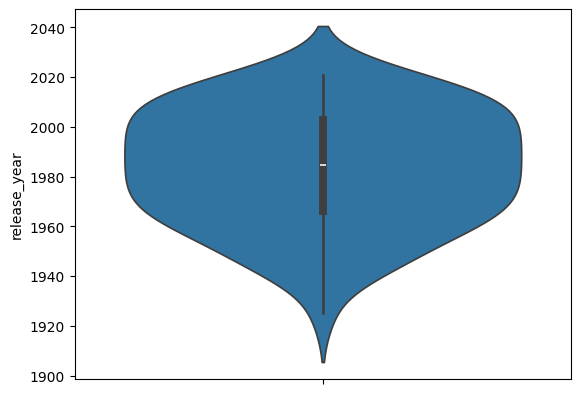

In [47]:
sns.violinplot(data=released_df, y='release_year')

<Axes: xlabel='release_year', ylabel='Count'>

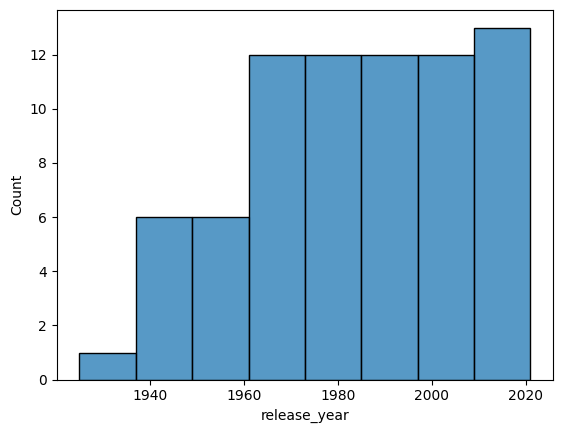

In [48]:
sns.histplot(data=released_df, x='release_year')

In [49]:
means = released_df.release_year.mode()
means

0     1925
1     1942
2     1943
3     1944
4     1945
      ... 
69    2017
70    2018
71    2019
72    2020
73    2021
Name: release_year, Length: 74, dtype: int64

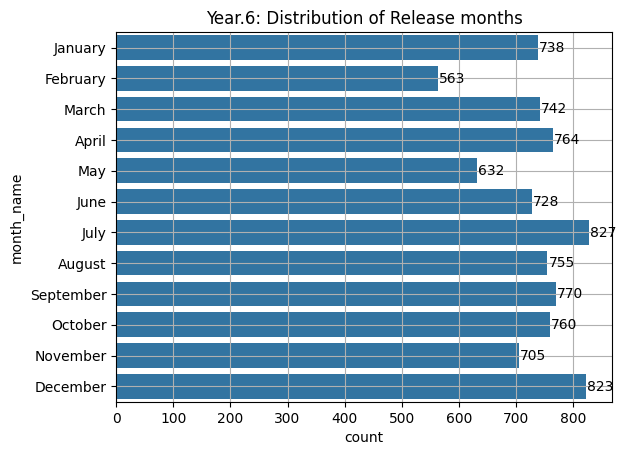

In [50]:
month_df = df[['date_added']].copy()
month_df['month_name'] = month_df.date_added.dt.month_name()
month_df['month_num'] = month_df.date_added.dt.month
plot = sns.countplot(data=month_df.sort_values(by='month_num'), y='month_name')
plt.grid(True)
ChartNumber="Year.6"
plt.title(f'{ChartNumber}: Distribution of Release months')
for patch in plot.patches:
    plt.text(patch.get_width() + 25, patch.get_y() + patch.get_height() / 2, 
             f'{patch.get_width():.0f}', 
             ha = 'center', va = 'center')             

<span style="color: yellow;">
<li>Max number of shows are released in July and December.  July is the start of the season maybe due to US independence day.
<li>Feb has the least number of releases


Text(0.5, 1.0, 'Year.7: Distribution of Show Types over the years')

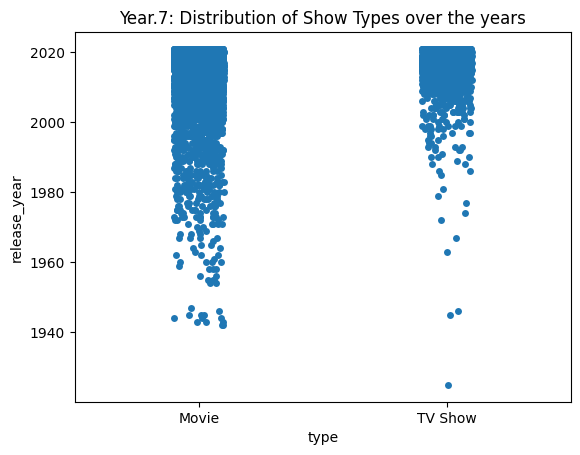

In [51]:
sns.stripplot(data=df, x='type', y='release_year')
ChartNumber="Year.7"
plt.title(f'{ChartNumber}: Distribution of Show Types over the years')

<span style="color: yellow;">
<li>Very few TV shows of timeline older than 1980 are present when compared to movies.

In [52]:
listedin_df = df_cleaned[["show_id","type","listed_in","date_added"]]
listedin_df

,show_id,type,listed_in,date_added
0,s1,Movie,Documentaries,2021-09-25
1,s2,TV Show,"International TV Shows, TV Dramas, TV Mysteries",2021-09-24
2,s3,TV Show,"Crime TV Shows, International TV Shows, TV Act...",2021-09-24
3,s4,TV Show,"Docuseries, Reality TV",2021-09-24
4,s5,TV Show,"International TV Shows, Romantic TV Shows, TV ...",2021-09-24
...,...,...,...,...
8802,s8803,Movie,"Cult Movies, Dramas, Thrillers",2019-11-20
8803,s8804,TV Show,"Kids' TV, Korean TV Shows, TV Comedies",2019-07-01
8804,s8805,Movie,"Comedies, Horror Movies",2019-11-01
8805,s8806,Movie,"Children & Family Movies, Comedies",2020-01-11


In [53]:
#Reusable function
def splitAndExplode(xdf, columnName):
    # Split the CSV values into lists
    xdf[columnName] = xdf[columnName].str.split(',')
    # Use explode to create separate rows for each value
    exploded_df = xdf.explode(columnName)
    # Trim spaces after exploding
    exploded_df[columnName] = exploded_df[columnName].str.strip()
    return exploded_df
listedin_df = splitAndExplode(listedin_df.copy(deep=True), 'listed_in')





In [54]:
listedin_df

,show_id,type,listed_in,date_added
0,s1,Movie,Documentaries,2021-09-25
1,s2,TV Show,International TV Shows,2021-09-24
1,s2,TV Show,TV Dramas,2021-09-24
1,s2,TV Show,TV Mysteries,2021-09-24
2,s3,TV Show,Crime TV Shows,2021-09-24
...,...,...,...,...
8805,s8806,Movie,Children & Family Movies,2020-01-11
8805,s8806,Movie,Comedies,2020-01-11
8806,s8807,Movie,Dramas,2019-03-02
8806,s8807,Movie,International Movies,2019-03-02


In [55]:
listedin_df


,show_id,type,listed_in,date_added
0,s1,Movie,Documentaries,2021-09-25
1,s2,TV Show,International TV Shows,2021-09-24
1,s2,TV Show,TV Dramas,2021-09-24
1,s2,TV Show,TV Mysteries,2021-09-24
2,s3,TV Show,Crime TV Shows,2021-09-24
...,...,...,...,...
8805,s8806,Movie,Children & Family Movies,2020-01-11
8805,s8806,Movie,Comedies,2020-01-11
8806,s8807,Movie,Dramas,2019-03-02
8806,s8807,Movie,International Movies,2019-03-02


In [56]:
#Sort
listedin_sorted_df = listedin_df.groupby(['listed_in','type'], as_index=False).size().sort_values(by='size',ascending=False)
listedin_sorted_df
# category_counts = ['listed_in'].value_counts().sort_values(ascending=False).reset_index()
# category_counts

,listed_in,type,size
16,International Movies,Movie,2752
12,Dramas,Movie,2427
7,Comedies,Movie,1674
17,International TV Shows,TV Show,1351
10,Documentaries,Movie,869
0,Action & Adventure,Movie,859
34,TV Dramas,TV Show,763
15,Independent Movies,Movie,756
4,Children & Family Movies,Movie,641
24,Romantic Movies,Movie,616


Total movies 6131
Total TV Shows 2676


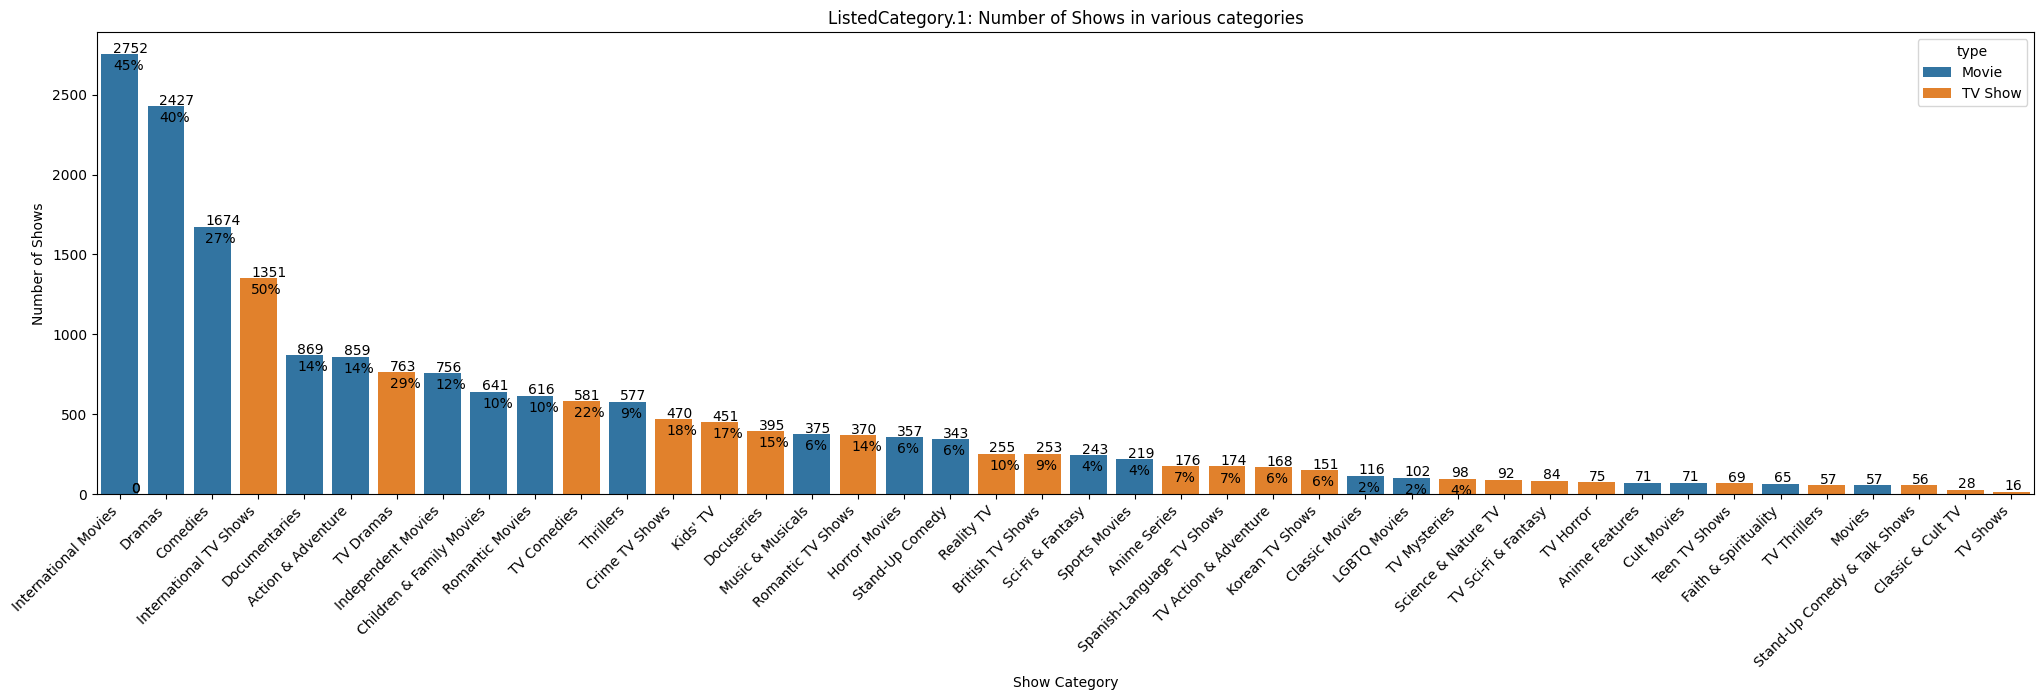

In [57]:
plt.figure(figsize=(25,6))
plot = sns.barplot(listedin_sorted_df,x='listed_in', y='size', hue='type')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Show Category')
plt.ylabel('Number of Shows') 
ChartNumber="ListedCategory.1"
plt.title(f'{ChartNumber}: Number of Shows in various categories') 

nmovies = df.query('type=="Movie"').shape[0]
nshows=df.query('type=="TV Show"').shape[0]
print(f'Total movies {nmovies}')
print(f'Total TV Shows {nshows}') 

for p in plot.patches:
    rvalue = p.get_facecolor()[0]
    #This will put the actual number 
    plot.annotate('{:}'.format(round(p.get_height())), (p.get_x()+0.25, p.get_height()+10))
    #For percentage, we have to put a logic as total movies is different from total TV Shows.
    #TV shows and Movies will come in different color.  Based on color, we can decide how to find the percentage
    if(rvalue == 0.19460784313725488):
        plot.annotate('{:}%'.format(round(p.get_height()/nmovies*100)), (p.get_x()+0.25, p.get_height()-100))
    else:
        plot.annotate('{:}%'.format(round(p.get_height()/nshows*100)), (p.get_x()+0.25, p.get_height()-100))
plt.show()

<span style="color: yellow;">
<li>Out of 6131 movies, 45% are international movies
<li>Out of 2676 TV Shows, 50% are international TV Shows
<li>Drama is the most popular category for both TV Shows and Movies, every 2 out of 5 movies is a drama, every 1 out of 3 TV Shows is a drama
<li>Every 4th movie is a comedy
<li>Every 5th tv show is a comedy

<p style="background-color: yellow; color: darkblue; padding: 5px; border-radius: 3px;">
    Recommendation 5: International movies, Drama and Comedies are the genres that should be encouraged more.  
</p>

In [58]:

listedin_df['year'] = listedin_df.date_added.dt.year

In [59]:
listedin_df

,show_id,type,listed_in,date_added,year
0,s1,Movie,Documentaries,2021-09-25,2021
1,s2,TV Show,International TV Shows,2021-09-24,2021
1,s2,TV Show,TV Dramas,2021-09-24,2021
1,s2,TV Show,TV Mysteries,2021-09-24,2021
2,s3,TV Show,Crime TV Shows,2021-09-24,2021
...,...,...,...,...,...
8805,s8806,Movie,Children & Family Movies,2020-01-11,2020
8805,s8806,Movie,Comedies,2020-01-11,2020
8806,s8807,Movie,Dramas,2019-03-02,2019
8806,s8807,Movie,International Movies,2019-03-02,2019


In [60]:
#sns.barplot(data = listedin_df.groupby(), x='year',
#sns.countplot(data=listedin_df, x='year', hue='listed_in')
listedin_groupByYear_df = listedin_df.groupby(['year','listed_in'], as_index=False).size()
listedin_groupByYear_df

,year,listed_in,size
0,2003,Classic & Cult TV,2
1,2003,TV Comedies,2
2,2008,Anime Series,1
3,2008,Crime TV Shows,1
4,2008,Dramas,1
...,...,...,...
336,2021,TV Sci-Fi & Fantasy,20
337,2021,TV Shows,5
338,2021,TV Thrillers,13
339,2021,Teen TV Shows,18


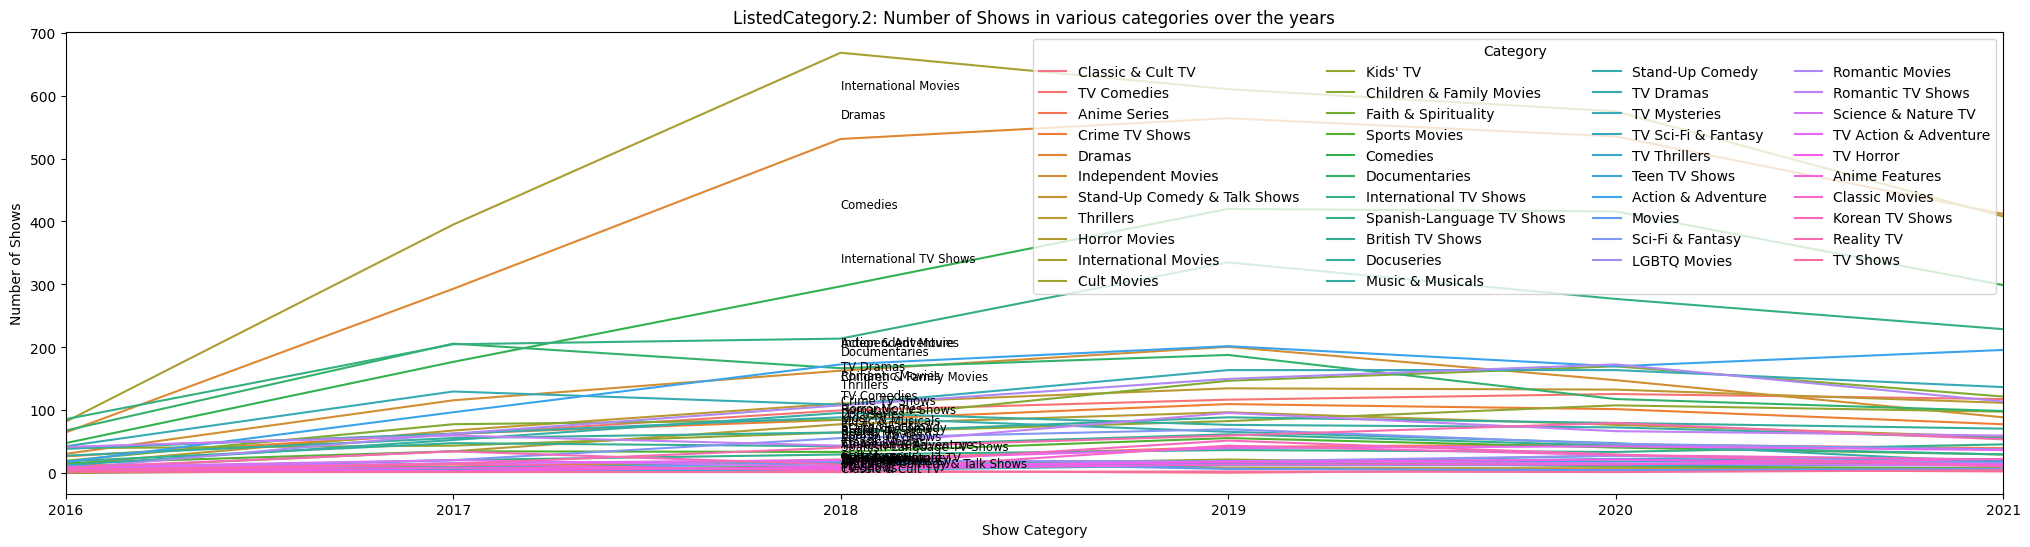

In [61]:

plt.figure(figsize=(25,6))

plt.xlabel('Show Category')
plt.ylabel('Number of Shows') 
ChartNumber="ListedCategory.2"
plt.title(f'{ChartNumber}: Number of Shows in various categories over the years') 
sns.lineplot(data=listedin_groupByYear_df,x='year',y='size', hue='listed_in')
#Legend with 4 columns
plt.legend(title='Category', ncol=4)
plt.xlim(2016,2021)

# Add labels to the lines
for category in listedin_groupByYear_df['listed_in'].unique():
    subset = listedin_groupByYear_df[listedin_groupByYear_df['listed_in'] == category]
    plt.text(subset['year'].iloc[-4], subset['size'].iloc[-3], category, 
             horizontalalignment='left', size='small', color='black', weight='normal')

<span style="color: yellow;">
<li>International movies, Drama and Comedies are the three categories that saw maximum percentage rise in recent years.

In [62]:
ratings_df = df_cleaned.groupby('rating', as_index=False).size()
ratings_df

,rating,size
0,G,41
1,NC-17,3
2,NR,80
3,PG,287
4,PG-13,490
5,R,799
6,TV-14,2160
7,TV-G,220
8,TV-MA,3214
9,TV-PG,863


In [63]:
# List of kid-friendly ratings 
kid_friendly_ratings = ['G', 'TV-G', 'TV-Y', 'TV-Y7', 'TV-Y7-FV']

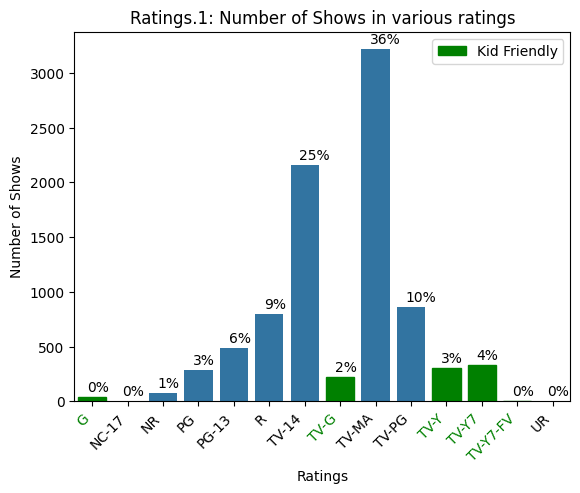

In [64]:
plot = sns.barplot(data=ratings_df, x='rating', y='size')

plt.xlabel('Ratings')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Shows') 
ChartNumber="Ratings.1"
plt.title(f'{ChartNumber}: Number of Shows in various ratings') 

total_shows = nmovies+nshows
# Get the x-tick labels
xtick_labels = [tick.get_text() for tick in plot.get_xticklabels()]
i=0
for p in plot.patches:
    plot.annotate('{:}%'.format(round(p.get_height()/total_shows*100)), (p.get_x()+0.25, p.get_height()+50))
    if(xtick_labels[i] in kid_friendly_ratings):
        p.set_color("green")
    i=i+1

# Change the color of a kid friendly ticks
for tick in plot.get_xticklabels():
    if tick.get_text() in kid_friendly_ratings:
        tick.set_color('green')  # Change to desired color

# Add a small green color rectangle as a legend 

green_patch = mpatches.Patch(color='green', label='Kid Friendly')
plt.legend(handles=[green_patch], loc='upper right')


In [ ]:
# List of kid-friendly ratings 
kid_friendly_ratings = ['G', 'TV-G', 'TV-Y', 'TV-Y7', 'TV-Y7-FV']
# Filter DataFrame for kid-friendly ratings and sum the sizes
total_kid_shows = ratings_df[ratings_df['rating'].isin(kid_friendly_ratings)]['size'].sum()

print("Total number of shows appropriate for kids:", total_kid_shows)
print(f'Percentage of total shows that are kids friendly {round(total_kid_shows/len(df)*100)}')

Total number of shows appropriate for kids: 908
Percentage of total shows that are kids friendly 10


<span style="color: yellow;">
<li>Only 10% of shows out of 8807 are kids-friendly
<li>36% of shows on netflix are for mature audience, and overall 90% of shows are for adults only.

<p style="background-color: yellow; color: darkblue; padding: 5px; border-radius: 3px;">
    Recommendation 3: Most people using Netflix are looking for adult content.  So quality content in these genres is always going to sell
</p>

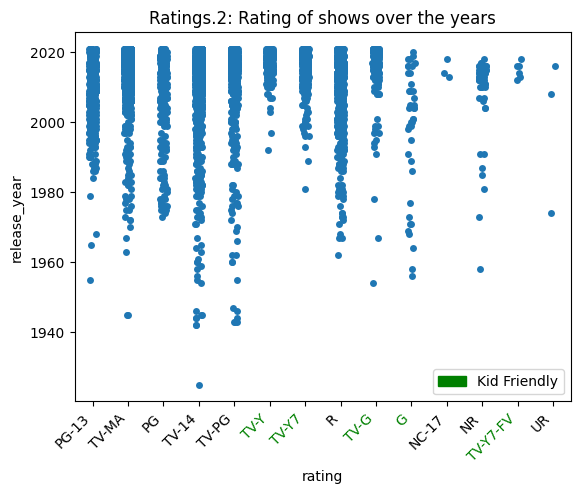

In [66]:
ChartNumber="Ratings.2"
plt.title(f'{ChartNumber}: Rating of shows over the years') 

plot= sns.stripplot(data=df, x='rating', y='release_year')
plt.xticks(rotation=45, ha='right')
# Change the color of a kid friendly ticks
for tick in plot.get_xticklabels():
    if tick.get_text() in kid_friendly_ratings:
        tick.set_color('green')  # Change to desired color
# Add a small green color rectangle as a legend 

green_patch = mpatches.Patch(color='green', label='Kid Friendly')
plt.legend(handles=[green_patch], loc='lower right')
plt.show()

<span style="color: yellow;">
<li>TV14 and TV-PG rated shows are the most consistent over the years.  It means these type of shows are “evergreen”
<li>Kid movies have lesser “shelf life”.  Maybe we can infer that nobody wants to see old kid movies.  This can explain why Netflix has less number of kid friendly movies.  They don’t have longevity.


In [67]:
country_df = df[['type','title','country','date_added', 'listed_in','duration']]
country_df = splitAndExplode(country_df.copy(deep=True), 'country')
country_df.country.unique()


array(['United States', 'South Africa', 'ALL', 'India', 'Ghana',
       'Burkina Faso', 'United Kingdom', 'Germany', 'Ethiopia',
       'Czech Republic', 'Mexico', 'Turkey', 'Australia', 'France',
       'Finland', 'China', 'Canada', 'Japan', 'Nigeria', 'Spain',
       'Belgium', 'South Korea', 'Singapore', 'Italy', 'Romania',
       'Argentina', 'Venezuela', 'Hong Kong', 'Russia', '', 'Ireland',
       'Nepal', 'New Zealand', 'Brazil', 'Greece', 'Jordan', 'Colombia',
       'Switzerland', 'Israel', 'Taiwan', 'Bulgaria', 'Algeria', 'Poland',
       'Saudi Arabia', 'Thailand', 'Indonesia', 'Egypt', 'Denmark',
       'Kuwait', 'Netherlands', 'Malaysia', 'Vietnam', 'Hungary',
       'Sweden', 'Lebanon', 'Syria', 'Philippines', 'Iceland',
       'United Arab Emirates', 'Norway', 'Qatar', 'Mauritius', 'Austria',
       'Cameroon', 'Palestine', 'Uruguay', 'Kenya', 'Chile', 'Luxembourg',
       'Cambodia', 'Bangladesh', 'Portugal', 'Cayman Islands', 'Senegal',
       'Serbia', 'Malta', 'Namib

In [68]:
country_df.shape[0]

10850

In [69]:
country_df

,type,title,country,date_added,listed_in,duration
0,Movie,Dick Johnson Is Dead,United States,2021-09-25,Documentaries,90 min
1,TV Show,Blood & Water,South Africa,2021-09-24,"International TV Shows, TV Dramas, TV Mysteries",2 Seasons
2,TV Show,Ganglands,ALL,2021-09-24,"Crime TV Shows, International TV Shows, TV Act...",1 Season
3,TV Show,Jailbirds New Orleans,ALL,2021-09-24,"Docuseries, Reality TV",1 Season
4,TV Show,Kota Factory,India,2021-09-24,"International TV Shows, Romantic TV Shows, TV ...",2 Seasons
...,...,...,...,...,...,...
8802,Movie,Zodiac,United States,2019-11-20,"Cult Movies, Dramas, Thrillers",158 min
8803,TV Show,Zombie Dumb,ALL,2019-07-01,"Kids' TV, Korean TV Shows, TV Comedies",2 Seasons
8804,Movie,Zombieland,United States,2019-11-01,"Comedies, Horror Movies",88 min
8805,Movie,Zoom,United States,2020-01-11,"Children & Family Movies, Comedies",88 min


In [70]:
pd.set_option('display.max_rows', None)

#lets look at shows that have International in their listed_in column.  I verified manually that these shows are specific to a country
#For ex, for rows in which country has India, and listed_in has International, all are Hindi or other Indian language based shows.
#Checked similar entries for South Korea to confirm that this interpretation of listed_in having International means its a local language show, is correct.
international_df = pd.DataFrame(columns=['country','tvshow','movies'])


for c in country_df.country.unique():
    tvshow = country_df[(country_df.country==c) & (country_df.listed_in.str.contains('International') & (country_df.type=='TV Show'))].shape[0]
    
    movies = country_df[(country_df.country==c) & (country_df.listed_in.str.contains('International') & (country_df.type=='Movie'))].shape[0]
    
    temp_df = pd.DataFrame({'country':[c],'tvshow':[tvshow],'movies':[movies]})
    international_df = pd.concat([international_df, temp_df])

international_df = international_df.reset_index(drop=True)
print(international_df)    
pd.reset_option('display.max_rows')

                  country tvshow movies
0           United States     74    166
1            South Africa      9     39
2                     ALL    223    209
3                   India     66    864
4                   Ghana      0      5
5            Burkina Faso      0      1
6          United Kingdom    128    170
7                 Germany     35     94
8                Ethiopia      0      1
9          Czech Republic      3     10
10                 Mexico     43     70
11                 Turkey     30     80
12              Australia     31     30
13                 France     43    207
14                Finland      2      6
15                  China     40     71
16                 Canada     25     60
17                  Japan    151     72
18                Nigeria      9     88
19                  Spain     54    140
20                Belgium     11     58
21            South Korea    152     44
22              Singapore     19     14
23                  Italy     13     52


In [71]:
international_df['total']=international_df.movies+international_df.tvshow
international_df









,country,tvshow,movies,total
0,United States,74,166,240
1,South Africa,9,39,48
2,ALL,223,209,432
3,India,66,864,930
4,Ghana,0,5,5
...,...,...,...,...
119,Sudan,0,0,0
120,Panama,0,0,0
121,Uganda,0,0,0
122,East Germany,0,0,0


In [72]:
#For the purpose of this analysis of comparing shows in International languages, I want to exclude the shows where we have ALL.  There is no information what these shows are or in which language.

# Get the index of rows where 'country' column has the value 'ALL'
all_index = international_df[international_df['country'] == 'ALL'].index
print(all_index)
# Drop the rows using the index
international_df = international_df.drop(all_index)
international_df

Index([2], dtype='int64')


,country,tvshow,movies,total
0,United States,74,166,240
1,South Africa,9,39,48
3,India,66,864,930
4,Ghana,0,5,5
5,Burkina Faso,0,1,1
...,...,...,...,...
119,Sudan,0,0,0
120,Panama,0,0,0
121,Uganda,0,0,0
122,East Germany,0,0,0


In [73]:
international_df.sort_values(by='total', ascending=False, inplace=True)
international_df

,country,tvshow,movies,total
3,India,66,864,930
6,United Kingdom,128,170,298
13,France,43,207,250
0,United States,74,166,240
17,Japan,151,72,223
...,...,...,...,...
98,Bermuda,0,0,0
87,Malawi,0,0,0
107,Nicaragua,0,0,0
72,Cayman Islands,0,0,0


C:\Users\Admin\AppData\Local\Temp\ipykernel_11312\1959597973.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


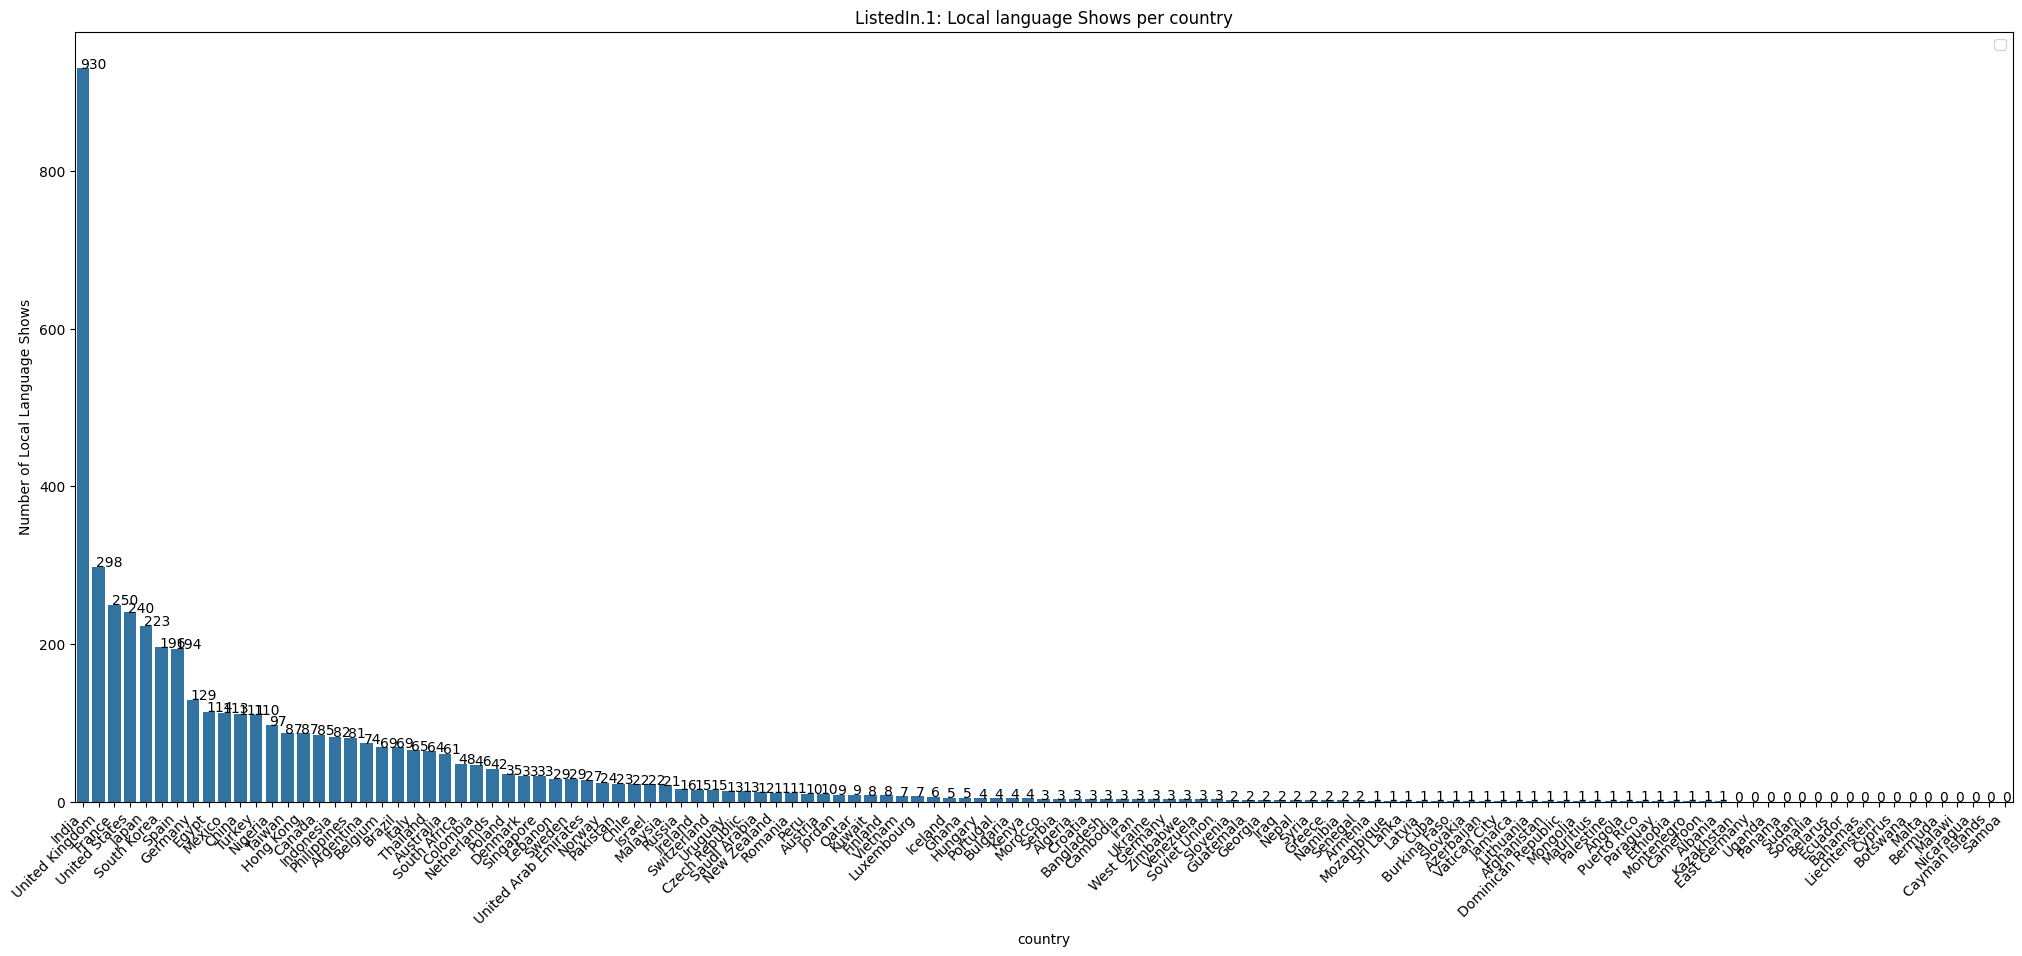

In [74]:
plt.figure(figsize=(25,10))
plot=sns.barplot(data=international_df, x='country', y='total')
plt.xticks(rotation=45,ha='right')
plt.ylabel('Number of Local Language Shows')
ChartNumber="ListedIn.1"
plt.title(f'{ChartNumber}: Local language Shows per country')
for p in plot.patches:
    plot.annotate('{:}'.format(round(p.get_height())), (p.get_x()+0.25, p.get_height()+0.25))
plt.legend()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11312\2599052266.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


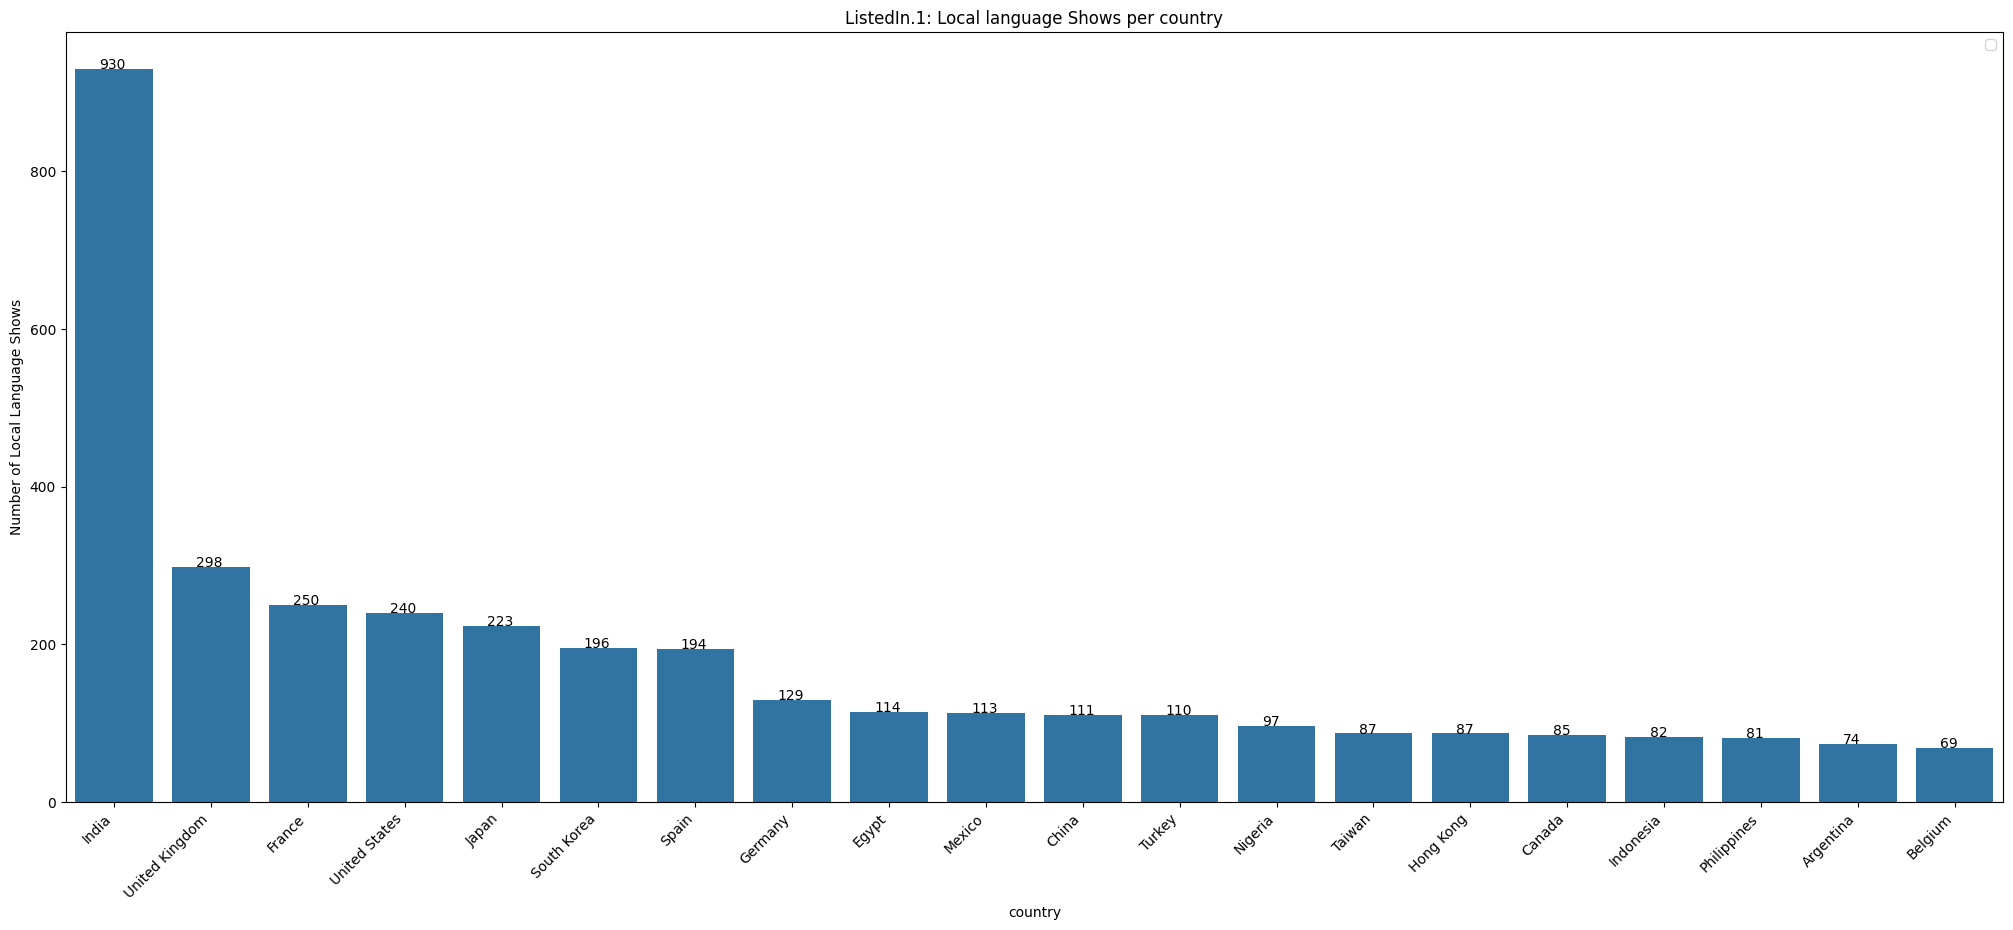

In [75]:
plt.figure(figsize=(25,10))
plot=sns.barplot(data=international_df.iloc[:20], x='country', y='total')
plt.xticks(rotation=45,ha='right')
plt.ylabel('Number of Local Language Shows')
ChartNumber="ListedIn.1"
plt.title(f'{ChartNumber}: Local language Shows per country')
for p in plot.patches:
    plot.annotate('{:}'.format(round(p.get_height())), (p.get_x()+0.25, p.get_height()+0.25))
plt.legend()
plt.show()

<span style="color: yellow;">
<li>India has the maximum number of internation shows listed
<li>Japan and South Korea are Asian countries with more shows than China, despite having significantly less population than China

In [76]:
allCountries_df= pd.read_csv("allCountries_df.csv")
allCountries_df

,Unnamed: 0,name,Population
0,0,Afghanistan,34.169723
1,1,Albania,2.881823
2,2,Algeria,39.917696
3,3,Andorra,0.000001
4,4,Angola,28.607677
...,...,...,...
197,197,Venezuela,0.000001
198,198,Vietnam,92.635828
199,199,Yemen,0.000001
200,200,Zambia,16.491819


In [77]:
international_df = international_df.merge(allCountries_df, how='left',left_on='country', right_on='name')
international_df.drop(columns=['Unnamed: 0','name'], inplace=True)


<Figure size 2500x1000 with 0 Axes>

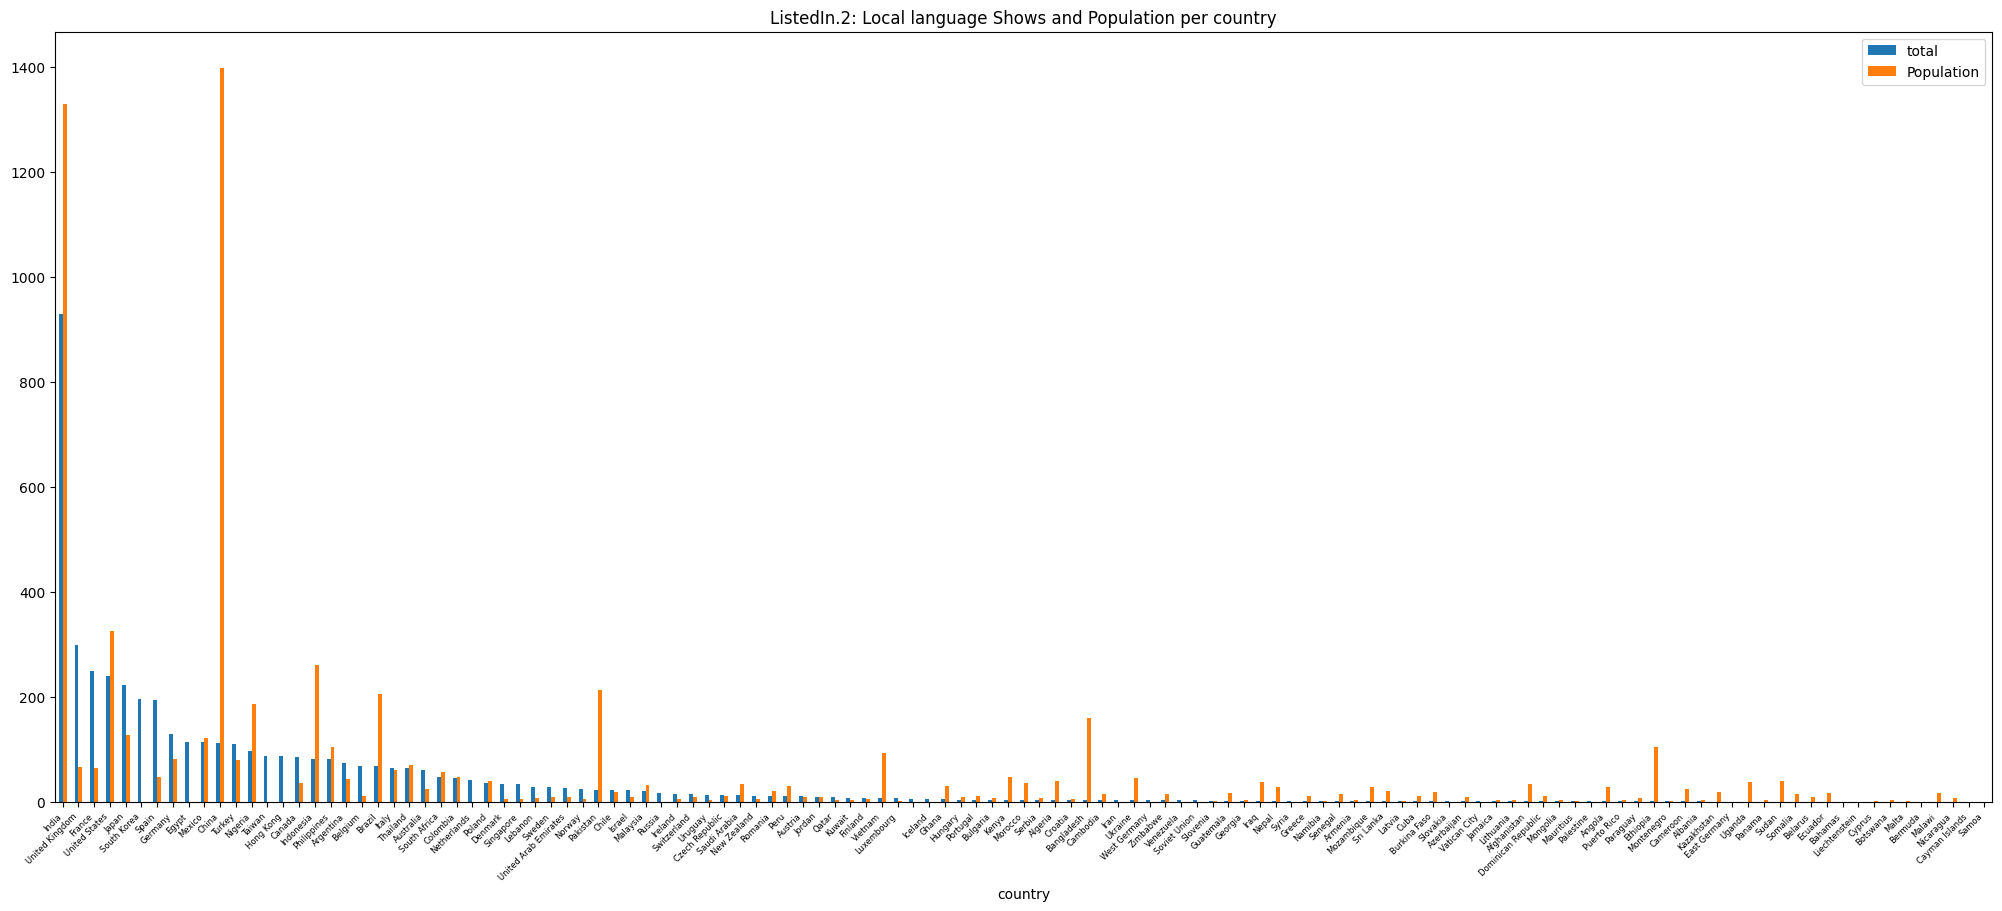

In [78]:
plt.figure(figsize=(25,10))
international_df.plot.bar(x='country',y=['total','Population'], figsize=(25,10))
ChartNumber="ListedIn.2"
plt.title(f'{ChartNumber}: Local language Shows and Population per country')
plt.xticks(rotation=45,ha='right',fontsize=6)
plt.show()

<span style="color: yellow;">
<li>Largest number of local language movies are released in India
<li>While India has a fair ratio in terms of shows and population, some other countries dont.  Lets findout

In [79]:
def calculateRatio(row):
    #print(row)
    if row.total!=0:
        return round(row.Population/row.total,2)
    else:
        return row.Population
international_df['pop_show_ratio'] = international_df.apply(calculateRatio, axis=1)*10
international_df

,country,tvshow,movies,total,Population,pop_show_ratio
0,India,66,864,930,1330.290669,14.30000
1,United Kingdom,128,170,298,65.428953,2.20000
2,France,43,207,250,63.897092,2.60000
3,United States,74,166,240,325.826238,13.60000
4,Japan,151,72,223,127.128592,5.70000
...,...,...,...,...,...,...
118,Bermuda,0,0,0,0.000001,0.00001
119,Malawi,0,0,0,17.158173,171.58173
120,Nicaragua,0,0,0,6.341277,63.41277
121,Cayman Islands,0,0,0,0.000001,0.00001


<Figure size 2500x1000 with 0 Axes>

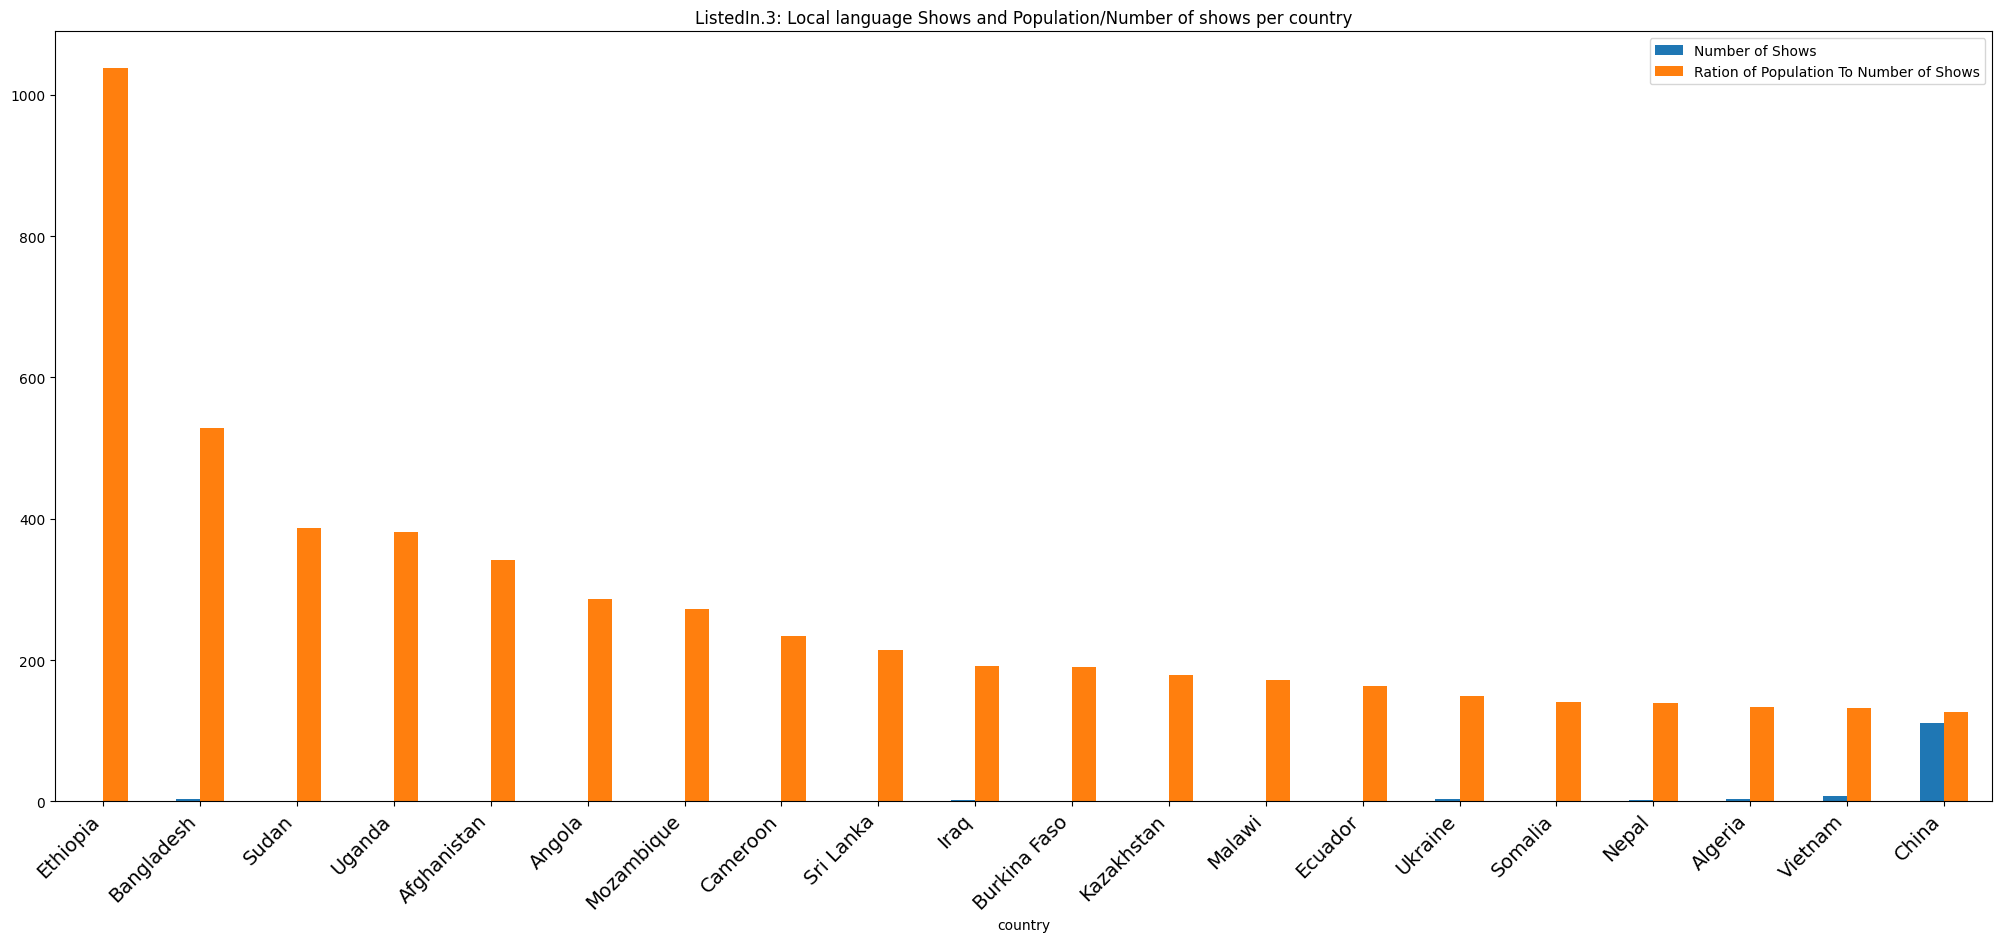

In [80]:
plt.figure(figsize=(25,10))
international_df.sort_values(by='pop_show_ratio', ascending=False).iloc[:20].plot.bar(x='country',y=['total','pop_show_ratio'], figsize=(25,10))
plt.xticks(rotation=45,ha='right',fontsize=14)
ChartNumber="ListedIn.3"
plt.title(f'{ChartNumber}: Local language Shows and Population/Number of shows per country')
plt.legend(['Number of Shows','Ration of Population To Number of Shows'])
plt.show()

<span style="color: yellow;">
<li>On basis of ratio of population to number of local language show, Ethiopia, Bangladesh, Sudan and Uganda are countries to target.  
</span>
<p style="background-color: lightcoral; color: black; padding: 5px; border-radius: 3px;">
    Need more data: As this needs more analysis in terms of per capita income.  How many people can even afford Netflix in these countries.
</p>




<p style="background-color: yellow; color: darkblue; padding: 5px; border-radius: 3px;">
    Recommendation 6: Netflix can look into how to reach out to some of the populous countries in Africa like Ethiopia, Sudan and Uganda, and Bangladesh. 
</p>

In [81]:
country_df[country_df.country=='India']

,type,title,country,date_added,listed_in,duration
4,TV Show,Kota Factory,India,2021-09-24,"International TV Shows, Romantic TV Shows, TV ...",2 Seasons
24,Movie,Jeans,India,2021-09-21,"Comedies, International Movies, Romantic Movies",166 min
29,Movie,Paranoia,India,2021-09-19,Thrillers,106 min
39,TV Show,Chhota Bheem,India,2021-09-16,Kids' TV,3 Seasons
50,TV Show,Dharmakshetra,India,2021-09-15,"International TV Shows, TV Dramas, TV Sci-Fi &...",1 Season
...,...,...,...,...,...,...
8773,Movie,Yanda Kartavya Aahe,India,2018-01-01,"Comedies, Dramas, International Movies",151 min
8775,TV Show,Yeh Meri Family,India,2018-08-31,"International TV Shows, TV Comedies",1 Season
8798,Movie,Zed Plus,India,2019-12-31,"Comedies, Dramas, International Movies",131 min
8799,Movie,Zenda,India,2018-02-15,"Dramas, International Movies",120 min


Text(0.5, 1.0, 'Countries.1: Movies and TV Shows per country')

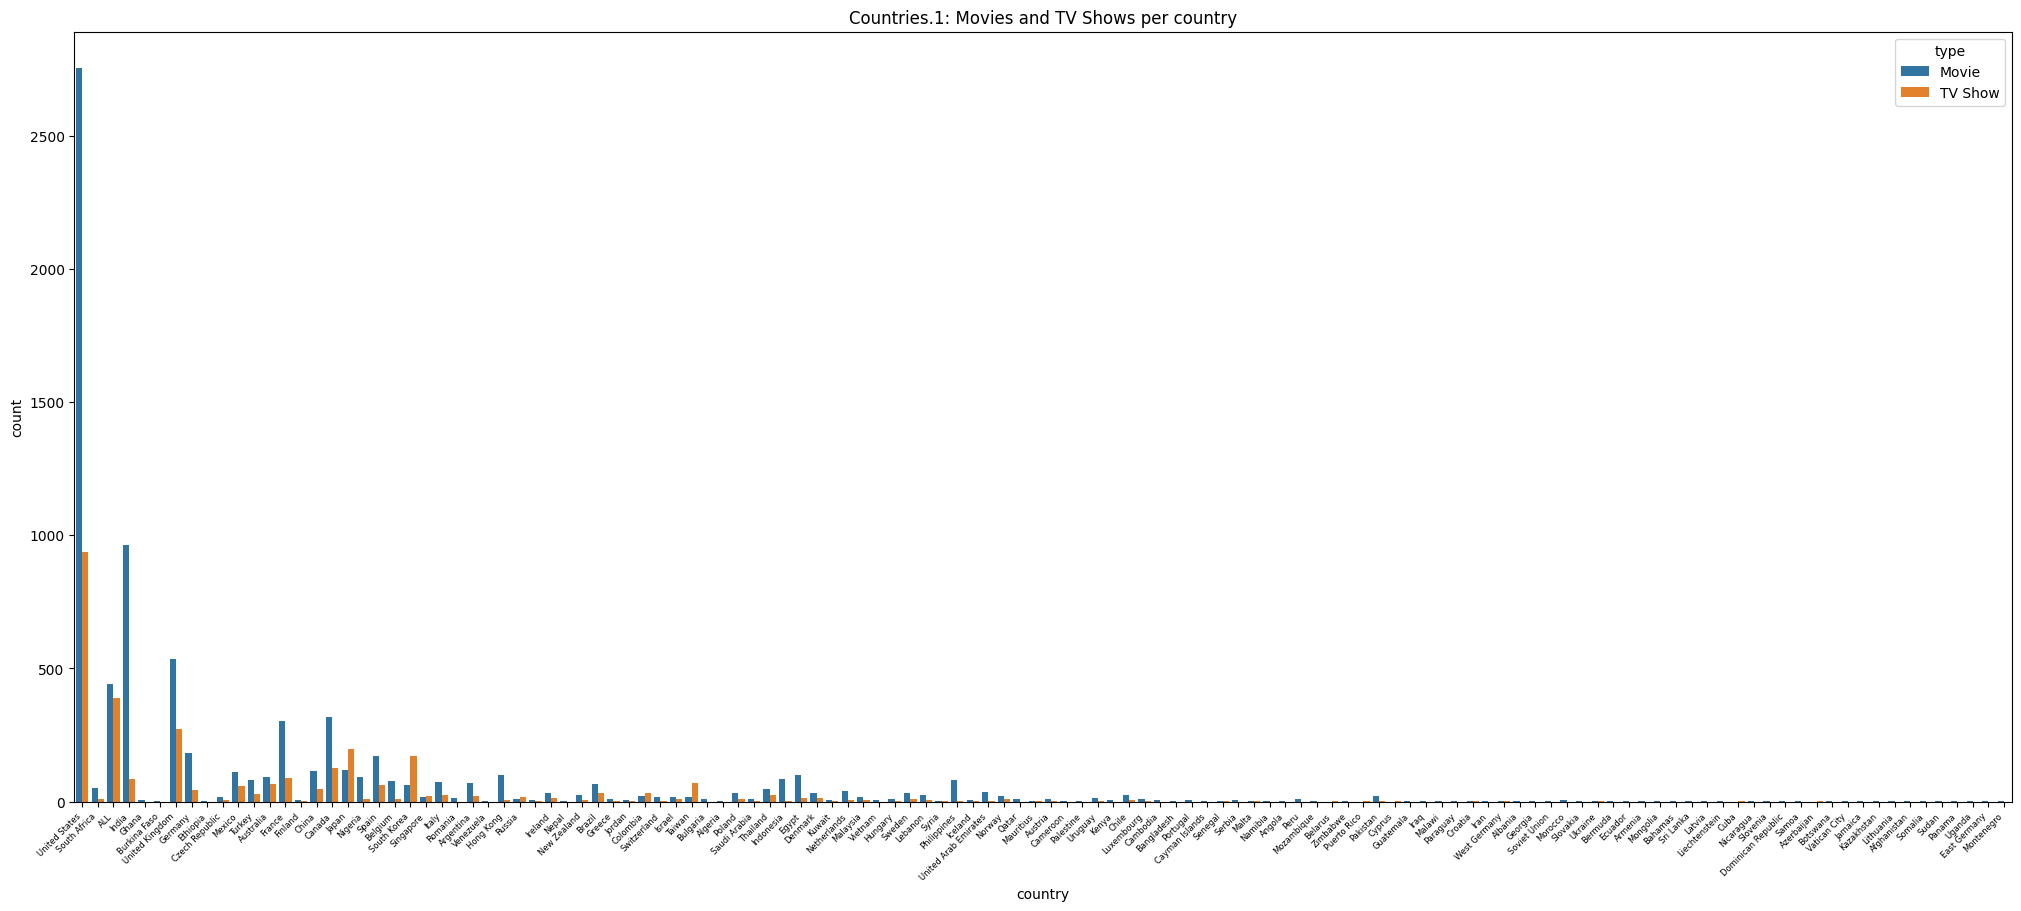

In [82]:
plt.figure(figsize=(25,10))
sns.countplot(data=country_df, x='country',hue='type')
plt.xticks(rotation=45,ha='right',fontsize=6)
ChartNumber="Countries.1"
plt.title(f'{ChartNumber}: Movies and TV Shows per country')

In [83]:
data = country_df[['type','country']]
data = data.groupby(['country','type'], as_index=False).size()
data = data.pivot(index='country',columns='type', values='size')
data

type,Movie,TV Show
country,,
,6.0,1.0
ALL,440.0,391.0
Afghanistan,1.0,NaN
Albania,1.0,NaN
Algeria,3.0,NaN
...,...,...
Vatican City,1.0,NaN
Venezuela,4.0,NaN
Vietnam,7.0,NaN


In [84]:
data['TV Show'] =data['TV Show'].fillna(0)
data['Movie']=data['Movie'].fillna(0)
data['total']=data['TV Show']+data.Movie
data.sort_values(by='total', ascending=False, inplace=True)


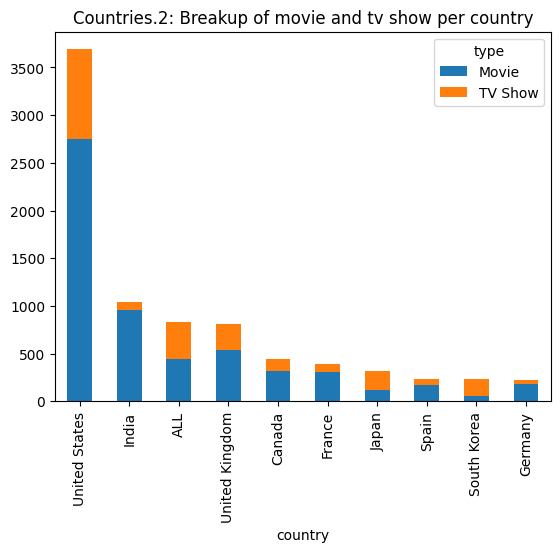

In [85]:
plot = data.iloc[:10].plot.bar(stacked =True, y=['Movie','TV Show'])
ChartNumber="Countries.2"
plt.title(f'{ChartNumber}: Breakup of movie and tv show per country')

plt.show()

<span style="color: yellow;">
<li>Among countries where Netflix has 400+ shows, South korea has highest ratio of TV Show versus Movies.  There aremany more TV shows released in S Korea as compared to Movies

In [86]:
data

type,Movie,TV Show,total
country,,,
United States,2752.0,938.0,3690.0
India,962.0,84.0,1046.0
ALL,440.0,391.0,831.0
United Kingdom,534.0,272.0,806.0
Canada,319.0,126.0,445.0
...,...,...,...
Slovakia,1.0,0.0,1.0
Ethiopia,1.0,0.0,1.0
Nicaragua,1.0,0.0,1.0


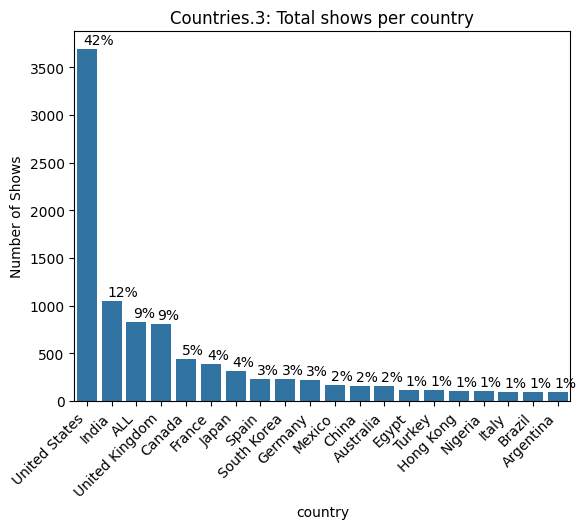

In [87]:
plot=sns.barplot(data =data.iloc[:20], x='country', y='total')
plt.xticks(rotation=45, ha='right')
ChartNumber="Countries.3"
plt.title(f'{ChartNumber}: Total shows per country')
plt.ylabel("Number of Shows")
for p in plot.patches:
    plot.annotate('{:}%'.format(round(p.get_height()/total_shows*100)), (p.get_x()+0.25, p.get_height()+50))
plt.show()

In [88]:
total_shows

8807

<span style="color: yellow;">
<li>Out of total 8807 shows, 42% were released in United States.  Next biggest country in terms of shows is India, UK and Canada.
<li>9% of shows are not marked with country, so we can assume they were released in all countries.

In [89]:
country_unique = country_df.country.unique()
# for c in allCountries_df.iterrows():
#     if(c[1]['name'] not in country_unique):
#         print (c[1]['name'], c[1]['Population'])
     
missingCountries = allCountries_df[~allCountries_df.name.isin(country_unique)].sort_values(by='Population', ascending=False)
missingCountries.head(10)


,Unnamed: 0,name,Population
179,179,Tanzania,53.410312
124,124,Myanmar,51.677032
194,194,Uzbekistan,31.188341
107,107,Madagascar,25.155487
131,131,Niger,20.498079
111,111,Mali,18.385580
200,200,Zambia,16.491819
35,35,Chad,14.348908
151,151,Rwanda,11.776857
72,72,Guinea,11.768478


In [90]:
#Fix country names
data = data.rename(index={'United States': 'United States of America'})
data


type,Movie,TV Show,total
country,,,
United States of America,2752.0,938.0,3690.0
India,962.0,84.0,1046.0
ALL,440.0,391.0,831.0
United Kingdom,534.0,272.0,806.0
Canada,319.0,126.0,445.0
...,...,...,...
Slovakia,1.0,0.0,1.0
Ethiopia,1.0,0.0,1.0
Nicaragua,1.0,0.0,1.0


In [91]:
country_df

,type,title,country,date_added,listed_in,duration
0,Movie,Dick Johnson Is Dead,United States,2021-09-25,Documentaries,90 min
1,TV Show,Blood & Water,South Africa,2021-09-24,"International TV Shows, TV Dramas, TV Mysteries",2 Seasons
2,TV Show,Ganglands,ALL,2021-09-24,"Crime TV Shows, International TV Shows, TV Act...",1 Season
3,TV Show,Jailbirds New Orleans,ALL,2021-09-24,"Docuseries, Reality TV",1 Season
4,TV Show,Kota Factory,India,2021-09-24,"International TV Shows, Romantic TV Shows, TV ...",2 Seasons
...,...,...,...,...,...,...
8802,Movie,Zodiac,United States,2019-11-20,"Cult Movies, Dramas, Thrillers",158 min
8803,TV Show,Zombie Dumb,ALL,2019-07-01,"Kids' TV, Korean TV Shows, TV Comedies",2 Seasons
8804,Movie,Zombieland,United States,2019-11-01,"Comedies, Horror Movies",88 min
8805,Movie,Zoom,United States,2020-01-11,"Children & Family Movies, Comedies",88 min


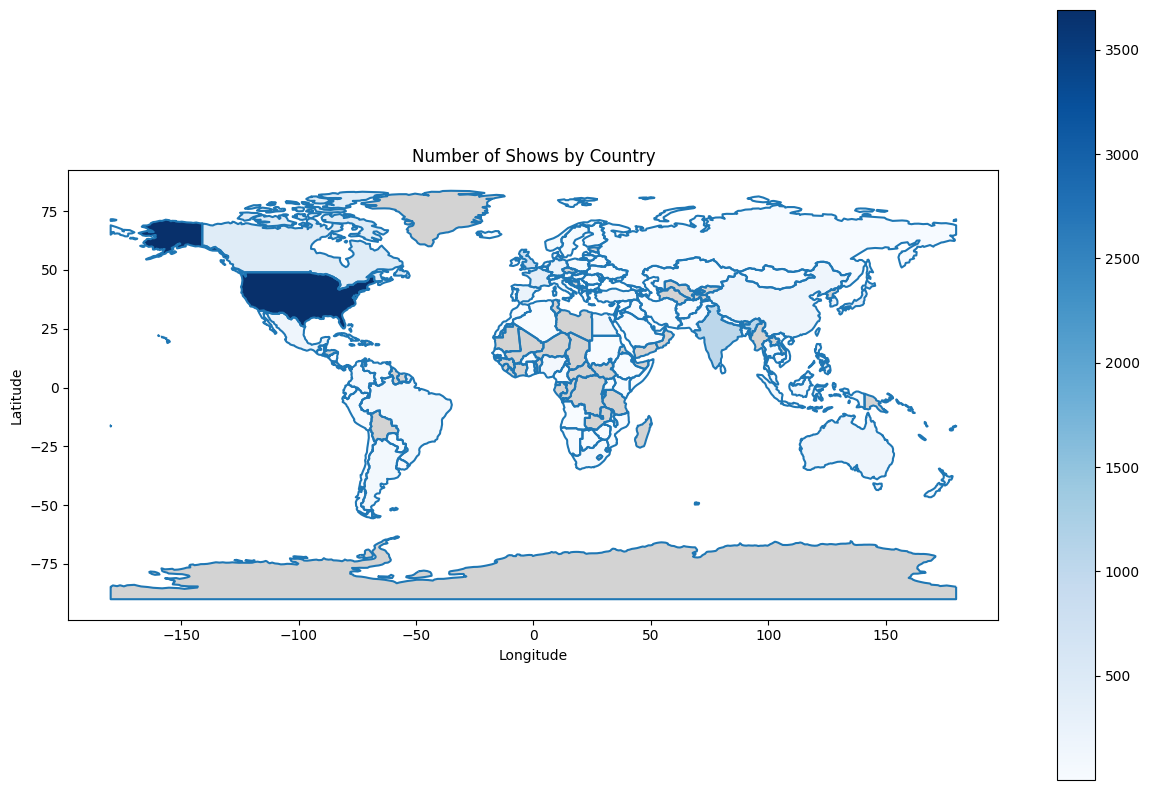

In [92]:

df = data

# Load the world map data from the local file
world = gpd.read_file('ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

# Merge your data with the world data
world = world.merge(df, how='left', left_on='NAME', right_on='country')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='total', ax=ax, legend=True, cmap='Blues', missing_kwds={"color": "lightgrey"})

# Customize the plot
plt.title('Number of Shows by Country')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

<span style="color: yellow;">
<li>Netflix is not yet present in quite a few countries in the African continent



In [93]:
df = df_cleaned.copy(deep=True)

In [94]:
director_df = df[['show_id', 'type','director','rating', 'duration','listed_in','country']].copy(deep=True)
director_df = splitAndExplode(director_df, 'director')
director_df



,show_id,type,director,rating,duration,listed_in,country
0,s1,Movie,Kirsten Johnson,PG-13,90 min,Documentaries,United States
1,s2,TV Show,other,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",South Africa
2,s3,TV Show,Julien Leclercq,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",ALL
3,s4,TV Show,other,TV-MA,1 Season,"Docuseries, Reality TV",ALL
4,s5,TV Show,other,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",India
...,...,...,...,...,...,...,...
8802,s8803,Movie,David Fincher,R,158 min,"Cult Movies, Dramas, Thrillers",United States
8803,s8804,TV Show,other,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies",ALL
8804,s8805,Movie,Ruben Fleischer,R,88 min,"Comedies, Horror Movies",United States
8805,s8806,Movie,Peter Hewitt,PG,88 min,"Children & Family Movies, Comedies",United States


In [95]:
director_count_df = director_df.groupby(['type','director'], as_index=False).size().sort_values(by='size', ascending=False)

director_count_df

,type,director,size
5077,TV Show,other,2446
4762,Movie,other,188
3582,Movie,Rajiv Chilaka,22
1817,Movie,Jan Suter,21
3633,Movie,Raúl Campos,19
...,...,...,...
2300,Movie,Kasper Barfoed,1
2301,Movie,Kasper Collin,1
2302,Movie,Kasra Farahani,1
2303,Movie,Katarina Launing,1


Text(0.5, 1.0, 'Director.1: Top 20 Movie Directors')

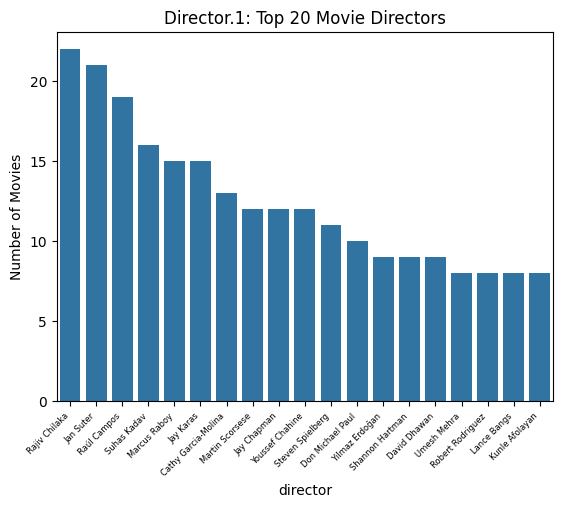

In [96]:
sns.barplot(director_count_df[director_count_df.type=='Movie'].iloc[:20].loc[director_count_df.director!='other'], x='director', y='size', )
plt.xticks(rotation=45,ha='right',fontsize=6)
ChartNumber="Director.1"
plt.ylabel("Number of Movies")
plt.title(f'{ChartNumber}: Top 20 Movie Directors')

<p style="background-color: yellow; color: darkblue; padding: 5px; border-radius: 3px;">
    Recommendation 10: Top 10 movie directors with more than 10 titles to their names have been identified.  Any movie by these directors should be prioritized
</p>

In [97]:
director_count_df.to_csv("director_count_df.csv")

<span style="color: yellow;">
<li>Rajiv Chilaka, Jan Suter and Raul Campos are most prolific movie directors with more than 15 movies on Netflix


In [98]:
director_count_df[director_count_df.type=='TV Show'].loc[director_count_df.director!='other'].shape[0]

299

Text(0.5, 1.0, 'Director.3: Top 20 TV Show Directors')

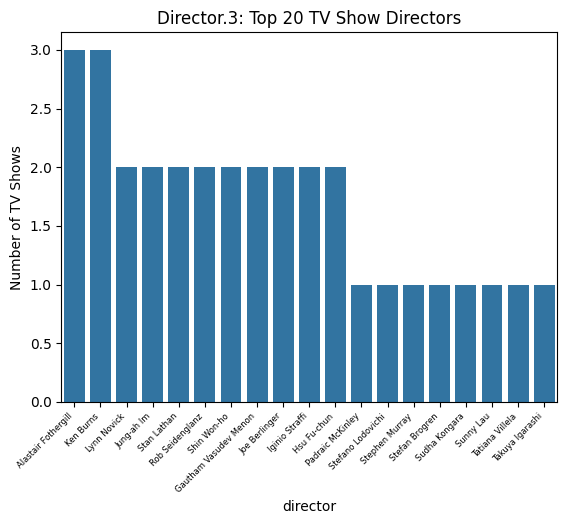

In [99]:
sns.barplot(director_count_df[director_count_df.type=='TV Show'].iloc[:20].loc[director_count_df.director!='other'], x='director', y='size', )
plt.xticks(rotation=45,ha='right',fontsize=6)
ChartNumber="Director.3"
plt.ylabel("Number of TV Shows")
plt.title(f'{ChartNumber}: Top 20 TV Show Directors')

This may not be giving true picture of successful TV shows directors.  Because a single TV show that runs for multiple seasons may be considered more successful that one that runs only for one season.  So TV Show count is not the right parameter to gauge Director success.   Lets analyse them considering who has given the TV shows that have ran the longest duration of times

In [100]:
#We need duration data in minutes
director_df['durationN'] = director_df['duration'].apply(normalizeDuration)
director_df



,show_id,type,director,rating,duration,listed_in,country,durationN
0,s1,Movie,Kirsten Johnson,PG-13,90 min,Documentaries,United States,90
1,s2,TV Show,other,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",South Africa,960
2,s3,TV Show,Julien Leclercq,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",ALL,480
3,s4,TV Show,other,TV-MA,1 Season,"Docuseries, Reality TV",ALL,480
4,s5,TV Show,other,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",India,960
...,...,...,...,...,...,...,...,...
8802,s8803,Movie,David Fincher,R,158 min,"Cult Movies, Dramas, Thrillers",United States,158
8803,s8804,TV Show,other,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies",ALL,960
8804,s8805,Movie,Ruben Fleischer,R,88 min,"Comedies, Horror Movies",United States,88
8805,s8806,Movie,Peter Hewitt,PG,88 min,"Children & Family Movies, Comedies",United States,88


In [101]:
#Extract TV show directors and convert the duration data into season
tvdirector_df = director_df.loc[director_df.type=='TV Show'].copy(deep=True)
tvdirector_df['durationN'] = round(tvdirector_df['durationN']/480).astype(int)
tvdirector_df.rename(columns={'durationN':'NumSeasons'}, inplace=True)


In [102]:
tvdirector_df_count = tvdirector_df.groupby('director', as_index=False).NumSeasons.sum().sort_values(by='NumSeasons', ascending=False)
tvdirector_df_count

,director,NumSeasons
299,other,4348
220,Phil Sgriccia,15
221,Philippa Lowthorpe,9
20,Andy Devonshire,9
93,Hayato Date,9
...,...,...
143,Karthik Subbaraj,1
144,Kazuya Murata,1
145,Kemi Adetiba,1
28,Bhavik Thakore,1


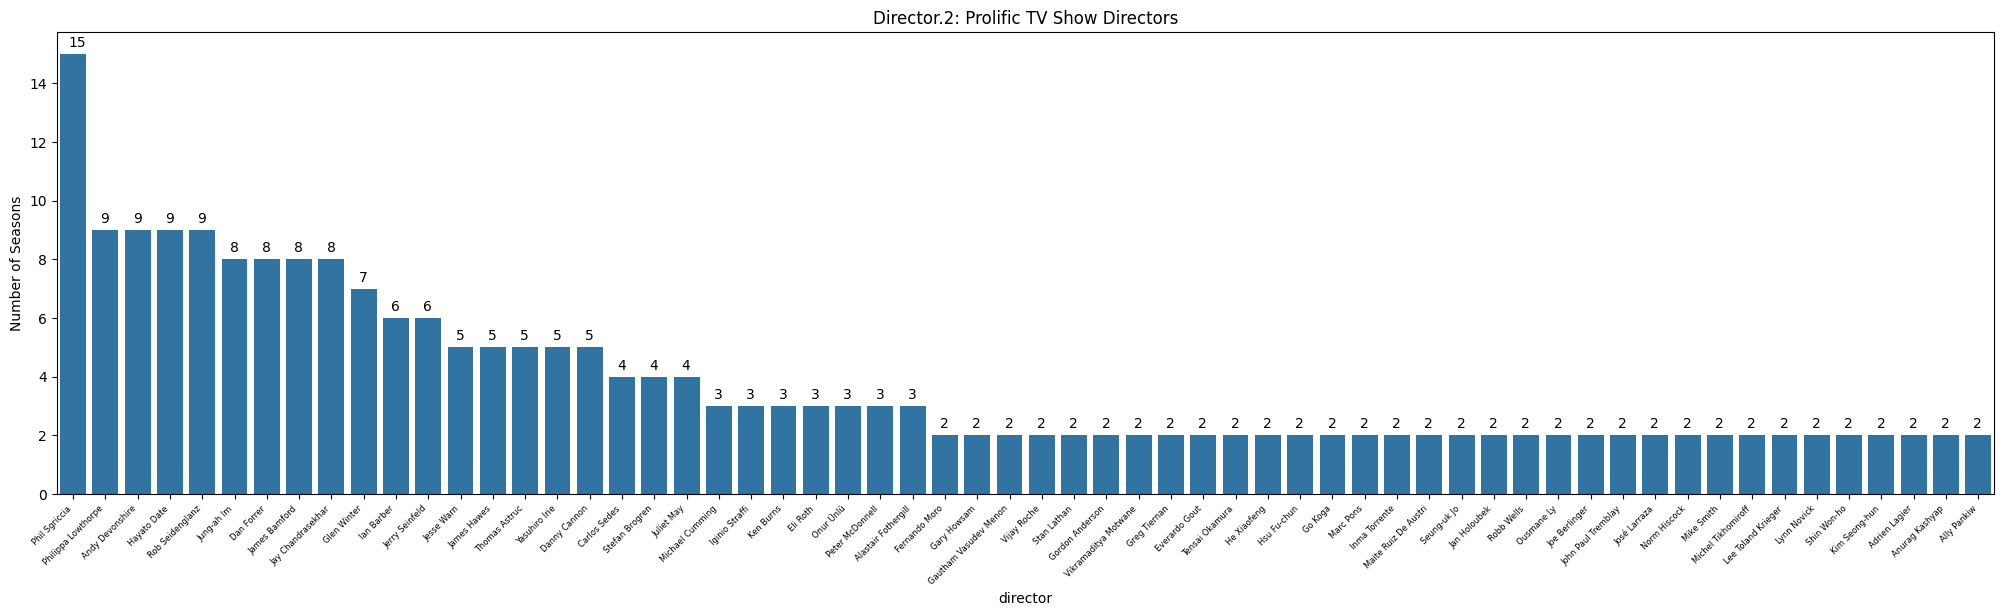

In [103]:
plt.figure(figsize=(25,6))
plot = sns.barplot(tvdirector_df_count.loc[(tvdirector_df_count.director!='other') & (tvdirector_df_count.NumSeasons>1)], x='director', y='NumSeasons' )
plt.xticks(rotation=45,ha='right',fontsize=6)
ChartNumber="Director.2"
plt.ylabel("Number of Seasons")
plt.title(f'{ChartNumber}: Prolific TV Show Directors')
for p in plot.patches:
    plot.annotate('{:}'.format(round(p.get_height())), (p.get_x()+0.25, p.get_height()+0.25))
plt.show()

In [104]:
# df_cleaned[df_cleaned.cast.str.contains('Macht')]
# plot.patches.count
tvdirector_df_count.loc[tvdirector_df_count.NumSeasons>1]
tvdirector_df_count.to_csv("tvdirector_df_count.csv")

<span style="color: yellow;">
<li>Plil Sgriccia is the most prolific TV Show director with more than 15 seasons

<p style="background-color: yellow; color: darkblue; padding: 5px; border-radius: 3px;">
    Recommendation: 60 TV directors out of 299 have achieved the distinction of creating more than one season.  Any shows by these directors should be prioritized.
</p>



In [105]:
cast_df = df[['show_id', 'type','cast','rating', 'duration','listed_in','country']]
cast_df = splitAndExplode(cast_df.copy(deep=True), 'cast')
cast_df


,show_id,type,cast,rating,duration,listed_in,country
0,s1,Movie,other,PG-13,90 min,Documentaries,United States
1,s2,TV Show,Ama Qamata,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",South Africa
1,s2,TV Show,Khosi Ngema,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",South Africa
1,s2,TV Show,Gail Mabalane,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",South Africa
1,s2,TV Show,Thabang Molaba,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",South Africa
...,...,...,...,...,...,...,...
8806,s8807,Movie,Manish Chaudhary,TV-14,111 min,"Dramas, International Movies, Music & Musicals",India
8806,s8807,Movie,Meghna Malik,TV-14,111 min,"Dramas, International Movies, Music & Musicals",India
8806,s8807,Movie,Malkeet Rauni,TV-14,111 min,"Dramas, International Movies, Music & Musicals",India
8806,s8807,Movie,Anita Shabdish,TV-14,111 min,"Dramas, International Movies, Music & Musicals",India


In [106]:
cast_count_df = cast_df.groupby('cast', as_index=False).size().sort_values(by='size', ascending=False)
cast_count_df.to_csv("cast_count_df.csv")

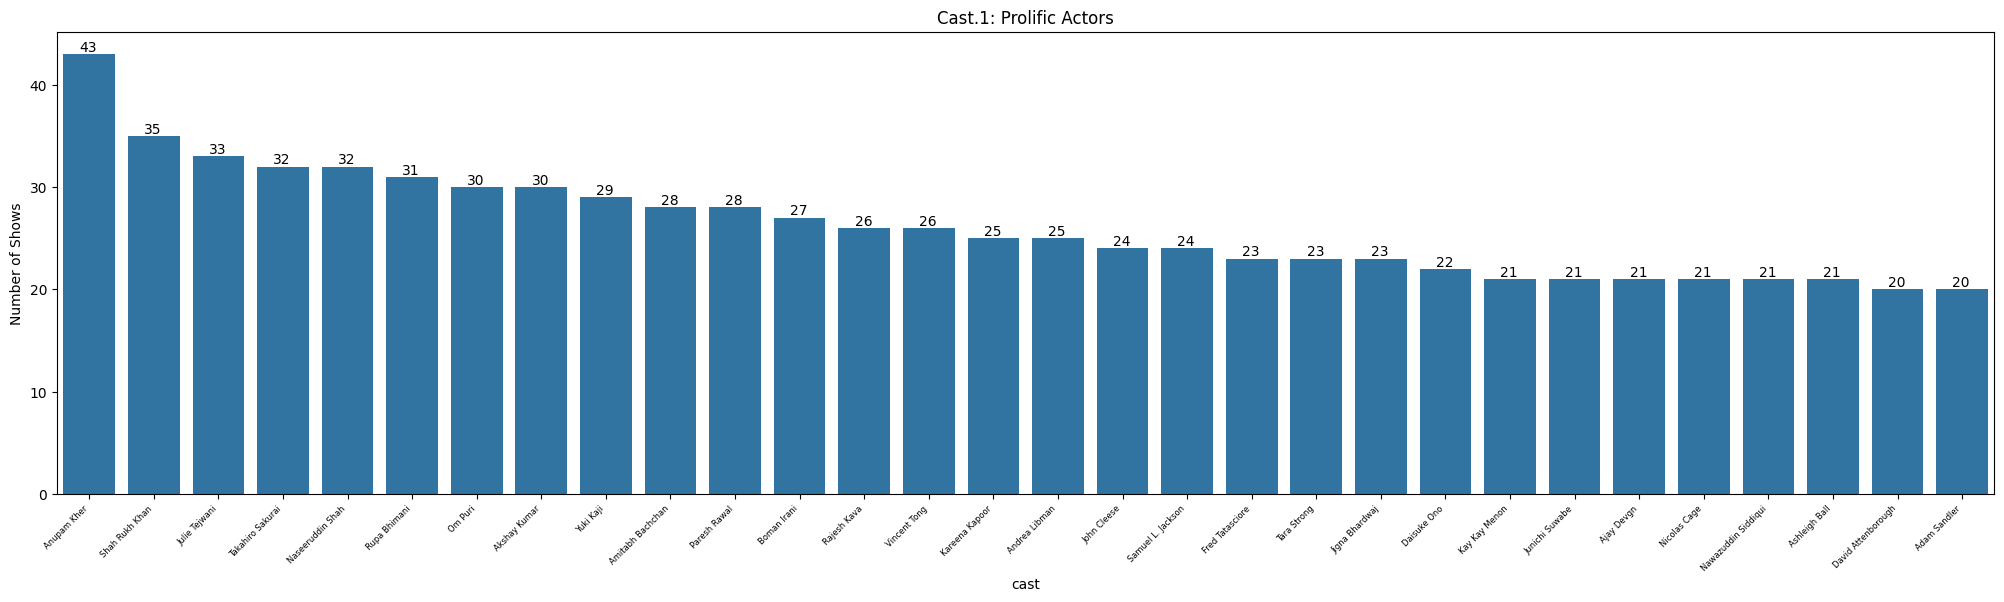

In [107]:
plt.figure(figsize=(25,6))
plot = sns.barplot(cast_count_df.loc[(cast_count_df.cast!='other') & (cast_count_df.size>1)].iloc[:30], x='cast', y='size' )
plt.xticks(rotation=45,ha='right',fontsize=6)
ChartNumber="Cast.1"
plt.ylabel("Number of Shows")
plt.title(f'{ChartNumber}: Prolific Actors')
for p in plot.patches:
    plot.annotate('{:}'.format(round(p.get_height())), (p.get_x()+0.25, p.get_height()+0.25))
plt.show()

In [108]:
cast_count_df.head(20)

,cast,size
36316,other,825
2832,Anupam Kher,43
30489,Shah Rukh Khan,35
16697,Julie Tejwani,33
32591,Takahiro Sakurai,32
24215,Naseeruddin Shah,32
28974,Rupa Bhimani,31
25424,Om Puri,30
845,Akshay Kumar,30
35880,Yuki Kaji,29


<span style="color: yellow;">
<li>Anupam Kher	,Shah Rukh Khan	,Julie Tejwani are the most prolific actors on shows on Netflix

<p style="background-color: yellow; color: darkblue; padding: 5px; border-radius: 3px;">
    Recommendation: Any movies from the following actors should be released on Netflix - Anupam Kher,Shah Rukh Khan,Julie Tejwani,Takahiro Sakurai,Naseeruddin Shah,Rupa Bhimani,Om Puri,Akshay Kumar,Yuki Kaji,Amitabh Bachchan,Paresh Rawal,Boman Irani,Rajesh Kava,Vincent Tong,Kareena Kapoor,Andrea Libman,John Cleese,Samuel L. Jackson,Fred Tatasciore,
</p>

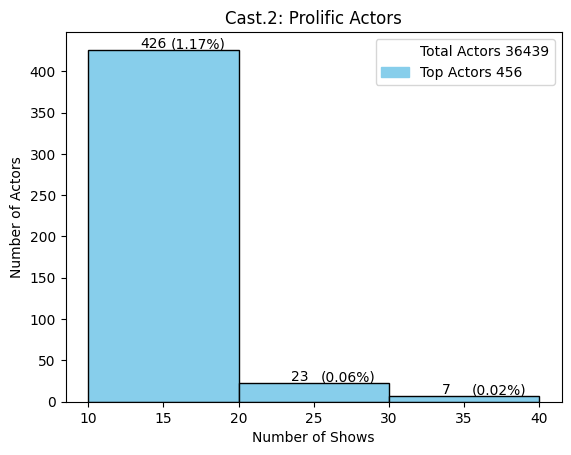

In [109]:
ChartNumber="Cast.2"
plt.ylabel("Number of Actors")
plt.xlabel("Number of Shows")
plt.title(f'{ChartNumber}: Prolific Actors')
plot = plt.hist(cast_count_df['size'], bins=[10, 20, 30, 40], color='skyblue',edgecolor='black')
i=0
totalNumActors = cast_count_df.shape[0]-1
for p in plot[0]:
     plt.gca().text(plot[1][i]+3.5, p+2,'{:}'.format(round(p)))
     plt.gca().text(plot[1][i]+5.5, p+2,'({:}%)'.format(round(p*100/totalNumActors,2)))
     i=i+1

total_patch = mpatches.Patch(color='white', label=f'Total Actors {totalNumActors}')
topactors_patch = mpatches.Patch(color='skyblue', label=f'Top Actors {round(plot[0].sum())}')
plt.legend(handles=[total_patch,topactors_patch], loc='upper right')
plt.show()

plt.show()

<p style="background-color: yellow; color: darkblue; padding: 5px; border-radius: 3px;">
    Recommendation 9: 456 actors have done more than 10 shows on Netflix.  That represents a number less than 2% of actors that have done any show on Netflix.  Hence, any show by the 456 actors should be released on Netflix
</p>

In [110]:
# Function to count the number of words in a string
def word_count(title):
    return len(title.split())

# Creating a new column 'word_count' with the word counts
df_cleaned['titleWordNum'] = df_cleaned['title'].apply(word_count)


Text(0.5, 1.0, 'Title.1: Number of words in Show Titles')

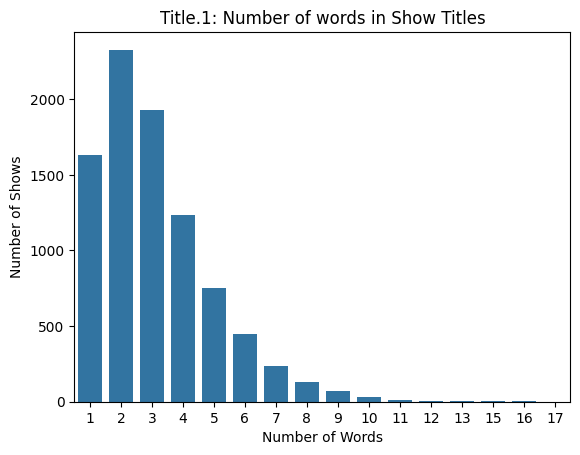

In [111]:
sns.countplot(data= df_cleaned, x='titleWordNum')
ChartNumber="Title.1"
plt.xlabel("Number of Words")
plt.ylabel("Number of Shows")
plt.title(f'{ChartNumber}: Number of words in Show Titles')



<span style="color: yellow;">
<li>Most shows have 2-3 words in the title


In [112]:
tvshow_df = df_cleaned.loc[df_cleaned.type=='TV Show'][['duration','titleWordNum']].copy(deep=True)
tvshow_df.duration = tvshow_df.duration.str.extract(r'(\d+)').astype(int)
#tvshow_df = tvshow_df.loc[tvshow_df.duration>1]

In [113]:
tvshow_df = tvshow_df.groupby(['duration','titleWordNum'], as_index=False).size()
tvshow_df

,duration,titleWordNum,size
0,1,1,286
1,1,2,511
2,1,3,423
3,1,4,264
4,1,5,155
...,...,...,...
73,13,1,1
74,13,3,1
75,13,4,1
76,15,1,2


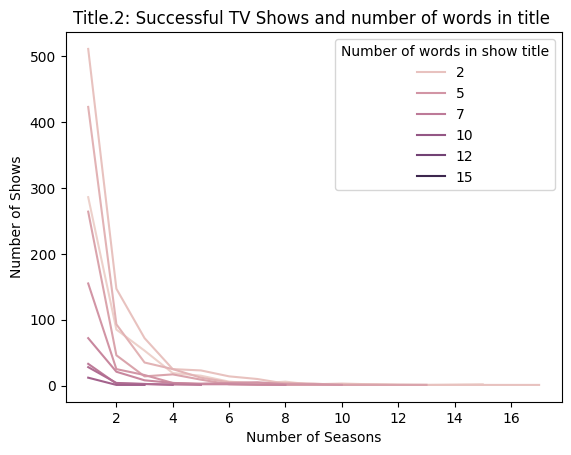

In [114]:
sns.lineplot(data=tvshow_df, x='duration', y='size', hue='titleWordNum')

ChartNumber="Title.2"
plt.title(f'{ChartNumber}: Successful TV Shows and number of words in title ')


plt.xlabel("Number of Seasons")
plt.ylabel("Number of Shows")
plt.legend(title='Number of words in show title')

<span style="color: yellow;">
<li>TV show titles having more than 4 words are not likely to succeed.  Its best to have 1-4 word titles.

Text(0.5, 1.0, 'Title.3: Number of words in TV Show Titles')

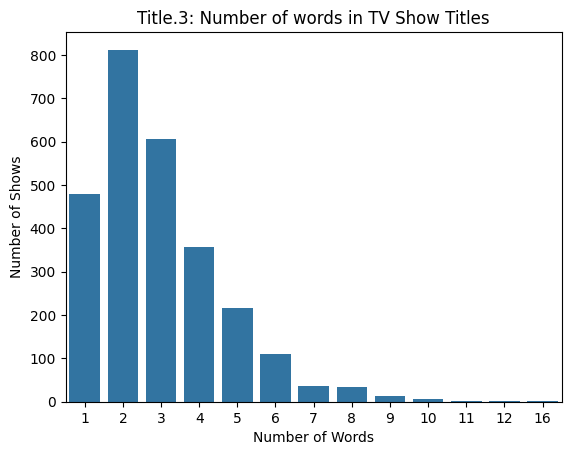

In [115]:
sns.barplot(data= tvshow_df.groupby('titleWordNum', as_index=False)['size'].sum(), x='titleWordNum', y= 'size')
ChartNumber="Title.3"
plt.xlabel("Number of Words")
plt.ylabel("Number of Shows")
plt.title(f'{ChartNumber}: Number of words in TV Show Titles')

In [ ]:
released_cut_df = released_df.groupby(pd.cut(released_df.release_year, bins=[1941,2000,2005,2010,2015,2020,2025]),observed=False).show_count.sum()
released_df
released_cut_df = released_cut_df.reset_index()


In [126]:
released_cut_df

,release_year,show_count
0,"(1941, 2000]",561
1,"(2000, 2005]",301
2,"(2005, 2010]",666
3,"(2010, 2015]",1622
4,"(2015, 2020]",5064
5,"(2020, 2025]",592


<Axes: title={'center': 'Bar plot - based on release_year of Movies & TV shows'}, xlabel='Bin of release year ', ylabel='Count of Movies & TV shows release by year'>

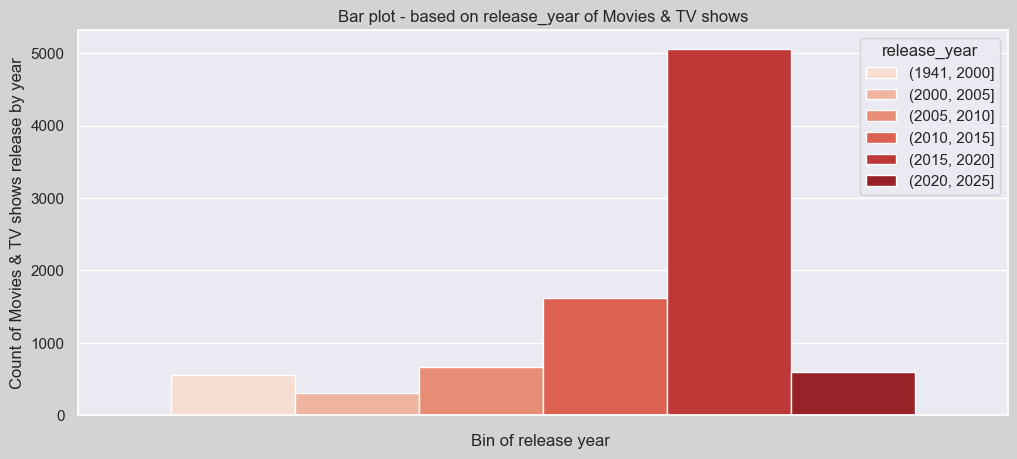

In [131]:
fig = plt.figure(figsize=(12,5))
#sns.set(style = "darkgrid")
fig.set_facecolor("lightgrey")
plt.title('Bar plot - based on release_year of Movies & TV shows', fontsize=12)
plt.ylabel('Count of Movies & TV shows release by year', fontsize=12)
plt.xlabel('Bin of release year ', fontsize=12)
plt.xticks(rotation = 80,fontsize=12)
sns.barplot(hue=released_cut_df.release_year,y='show_count',data=released_cut_df,palette="Reds")

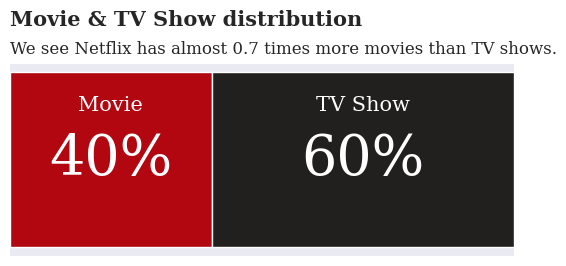

In [148]:
movie_percent, shows_percent = .40,.6

fig, ax = plt.subplots(1,1,figsize=(6.5, 2.5))

ax.barh(0, movie_percent, color='#b20710')
ax.barh(0, shows_percent, left=movie_percent, color='#221f1f')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

fig.text(0.125,1.03,'Movie & TV Show distribution', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.92,f'We see Netflix has almost {round(movie_percent/shows_percent, 1)} times more movies than TV shows.',fontfamily='serif',fontsize=12)  
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

# Filling up the details for Movies
ax.annotate(f"{int(movie_percent*100)}%",  xy=(movie_percent/2, 0), va = 'center', 
            ha='center',fontsize=40, fontweight='light', fontfamily='serif', color='white')
ax.annotate("Movie", xy=(movie_percent/2, 0.25), va = 'center', ha='center',
            fontsize=15, fontweight='light', fontfamily='serif', color='white')

# Filling up the details for TV shows
ax.annotate(f"{int(shows_percent*100)}%", xy=(movie_percent + (shows_percent/2), 0),
            va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif', color='white')
ax.annotate("TV Show", xy=(movie_percent + (shows_percent/2), 0.25),
            va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif', color='white')

plt.show()

In [149]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,other,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,other,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",ALL,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,other,other,ALL,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,other,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,other,other,ALL,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [156]:
movies_df = df[df['type']=='Movie'].copy(deep=True)
movies_df



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,other,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",ALL,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [157]:
movies_df['genre'] = movies_df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
movies_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,other,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",[Documentaries]
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",ALL,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,[Children & Family Movies]
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...","[Dramas, Independent Movies, International Mov..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,"[Comedies, Dramas]"
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,"[Dramas, International Movies]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,"[Dramas, International Movies, Thrillers]"
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...","[Cult Movies, Dramas, Thrillers]"
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,"[Comedies, Horror Movies]"
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...","[Children & Family Movies, Comedies]"


In [161]:
Types = []
for i in movies_df['genre']: Types += i
Types = set(Types)
print("There are {} types in the Netflix {} Dataset".format(len(Types),"a"))  
print(Types)  
test = movies_df['genre']
test

There are 20 types in the Netflix a Dataset
{'Romantic Movies', 'Anime Features', 'Independent Movies', 'International Movies', 'Comedies', 'Stand-Up Comedy', 'Dramas', 'Cult Movies', 'Documentaries', 'Music & Musicals', 'Horror Movies', 'Movies', 'Faith & Spirituality', 'Classic Movies', 'LGBTQ Movies', 'Sci-Fi & Fantasy', 'Sports Movies', 'Thrillers', 'Children & Family Movies', 'Action & Adventure'}


0                                         [Documentaries]
6                              [Children & Family Movies]
7       [Dramas, Independent Movies, International Mov...
9                                      [Comedies, Dramas]
12                         [Dramas, International Movies]
                              ...                        
8801            [Dramas, International Movies, Thrillers]
8802                     [Cult Movies, Dramas, Thrillers]
8804                            [Comedies, Horror Movies]
8805                 [Children & Family Movies, Comedies]
8806     [Dramas, International Movies, Music & Musicals]
Name: genre, Length: 6131, dtype: object

There are 20 types in the Netflix Movie Dataset
{'Romantic Movies', 'Anime Features', 'Independent Movies', 'International Movies', 'Comedies', 'Stand-Up Comedy', 'Dramas', 'Cult Movies', 'Documentaries', 'Music & Musicals', 'Horror Movies', 'Movies', 'Faith & Spirituality', 'Classic Movies', 'LGBTQ Movies', 'Sci-Fi & Fantasy', 'Sports Movies', 'Thrillers', 'Children & Family Movies', 'Action & Adventure'}
(20, 20)


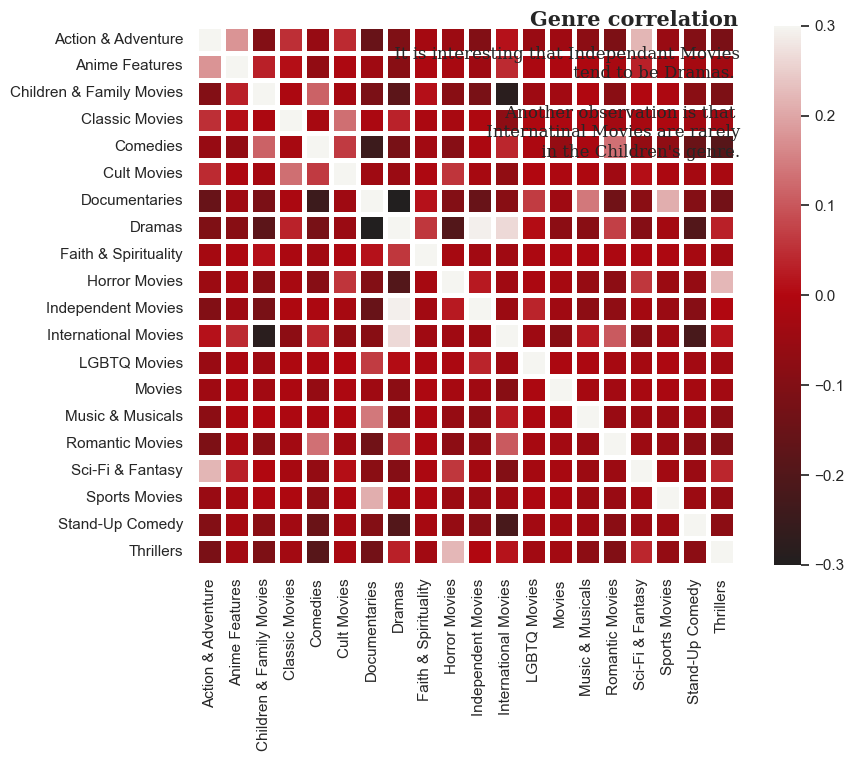

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer 
import numpy as np
import matplotlib.colors


# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710','#f5f5f1'])



def genre_heatmap(df, title):
    df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
    Types = []
    for i in df['genre']: Types += i
    Types = set(Types)
    print("There are {} types in the Netflix {} Dataset".format(len(Types),title))  
    print(Types)  
    test = df['genre']

    
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()

    print(corr.shape)

    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(10, 7))
    fig.text(.54,.88,'Genre correlation', fontfamily='serif',fontweight='bold',fontsize=15)
    fig.text(.75,.665,
            '''
             It is interesting that Independant Movies
             tend to be Dramas. 
             
             Another observation is that 
             Internatinal Movies are rarely
             in the Children's genre.
             ''', fontfamily='serif',fontsize=12,ha='right')
    pl = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, vmin=-.3, center=0, square=True, linewidths=2.5)
    
    plt.show()


movies_df = df[df['type']=='Movie'].copy(deep=True)
genre_heatmap(movies_df, 'Movie')
plt.show()